## Table of Contents
- [Introduction](#intro)

- [Data Wrangling](#Wrangling)
   
- [Data Exploring](#explor)

   - [Univariate Exploration](#uni)
   
   - [Bivariate Exploration](#bai)
   
   - [Multivariate Exploration](#multi)
   
- [Hypothesis Testing](#hyp)

- [Feature Extraction](#extract)

- [Machine Learning](#Prediction)

<a id='intro'></a>
## Introduction 
### In this project, We focus on analyzing  King County House Prices dataset ,The overall objective of this analysis is to provide in-depth insight into this dataset, and building a model to predict the sale prices.This analysis allows us to draw a comprehensive picture in general about the given dataset, such as the feature that have greatest impact on house price. through answering some questions such as:

   - [What is the feature that have the greatest impact on the data?](#Q1)
 
      - [Overview of house features](#features)
      - [How important is a large lot?](#large_lot)
      - [What is the building grade and how does it affect price?](#garde)

   - [how the time factor affect the sale prices?](#Q2)
      - [What is the  quarter with highiest sales?](#Qua)
      - [What is disrtibution of the month with highiest pecentage sales?](#mon)
  

<a id='Wrangling'></a>
## Part I -  Wrangling

In [1]:
#Laibraries that I will use it in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
import statsmodels.api as sm
#from  pandas_profiling import ProfileReport
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import learning_curve
import warnings
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

In [2]:
# Read the CSV File Using Pandas read_csv function
King_County_Data= pd.read_csv('kc_house_data.csv')
# Print the first 5 rows of the dataset
King_County_Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Print the summary of the dataset including the columns names , data type and count of non-null values for each coulmn
King_County_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Check the shape of Dataset
King_County_Data.shape

(21613, 21)

In [5]:
# Print how many duplicated value in the dataset
sum(King_County_Data.duplicated())

0

In [6]:
#Check the duplicate in id column
sum(King_County_Data['id'].duplicated())

177

- We note that there are multiple entries with same id. This would be due to the fact that a house may have been sold twice and thus have two entries.

            For now we will keep entries and allow the model to treat them as seperate data points.

In [7]:
# Check for null values in each column
King_County_Data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Use describe function to get describtion about numeric values in our dataset
King_County_Data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# Using unique function to check the values in column
print(King_County_Data['waterfront'].unique())

[0 1]


In [10]:
# Using unique function to check the values in column
print(King_County_Data['view'].unique())

[0 3 4 2 1]


In [11]:
# Using unique function to check the values in column
print(King_County_Data['condition'].unique())

[3 5 4 1 2]


In [12]:
# Using unique function to check the values in column
print(King_County_Data['bathrooms'].unique())

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


In [13]:
# Using unique function to check the values in column
print(King_County_Data['grade'].unique())

[ 7  6  8 11  9  5 10 12  4  3 13  1]


In [14]:
print(King_County_Data['bedrooms'].unique())

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [15]:
# Create a new copy of table to apply changes on it 
King_County_Data_Copy = King_County_Data.copy()

In [16]:
# Define function has_basement that convert the column has_basement into boolean because not all houses has basement 
def has_basement(King_County_Data_Copy):
    King_County_Data_Copy['has_basement'] = King_County_Data_Copy['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    King_County_Data_Copy = King_County_Data_Copy.drop('sqft_basement', axis = 1)
    return King_County_Data_Copy

In [17]:
# Apply function to DataFrame
King_County_Data_Copy = has_basement(King_County_Data_Copy)
King_County_Data_Copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0


In [18]:
# Using unique function to check the values in column
King_County_Data_Copy['has_basement'].unique()

array([0, 1], dtype=int64)

In [19]:
# Using to_datetime() function to convert date column into date type
King_County_Data_Copy['date'] = pd.to_datetime(King_County_Data_Copy['date'])
King_County_Data_Copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,2004,0,98027,47.5345,-122.069,1410,1287,0


In [20]:
#Using format='%Y' to generate new column contain year of sale
King_County_Data_Copy['date'] = pd.to_datetime(King_County_Data_Copy['date'], format='%Y')

# Extract the year in the desired format
King_County_Data_Copy['Year_of_sale'] = King_County_Data_Copy['date'].dt.strftime('%Y')
King_County_Data_Copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,Year_of_sale
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,1955,0,98178,47.5112,-122.257,1340,5650,0,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,1933,0,98028,47.7379,-122.233,2720,8062,0,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,1965,0,98136,47.5208,-122.393,1360,5000,1,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,1987,0,98074,47.6168,-122.045,1800,7503,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,2009,0,98103,47.6993,-122.346,1530,1509,0,2014
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,2014,0,98146,47.5107,-122.362,1830,7200,0,2015
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,2009,0,98144,47.5944,-122.299,1020,2007,0,2014
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,2004,0,98027,47.5345,-122.069,1410,1287,0,2015


In [21]:
# Define a function called renovated that converts the values into zeros and one's because not all houses were renovated
def renovated(King_County_Data_Copy):
    King_County_Data_Copy['Renovated'] = King_County_Data_Copy['yr_renovated'].map(lambda x: 1 if x > 1900 else 0)
    return King_County_Data_Copy

In [22]:
# Apply renovated function to DataFrame 
King_County_Data_Copy = renovated(King_County_Data_Copy)

In [23]:
#Using head() to show the changes on data
King_County_Data_Copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,Year_of_sale,Renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,2014,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,0


- there is float values in bathrooms feature that means not of all bathroom stuff such as 'shower, sink, bathtub' are not fully provided

In [24]:
# We want to cut it into 5 equal intervals based on a column named 'yr_built'
n_intervals = 5
# Cut the DataFrame into equal intervals
King_County_Data_Copy['interval'] = pd.cut(King_County_Data_Copy['yr_built'], bins=n_intervals)
# Convert the interval boundaries to integers
King_County_Data_Copy['interval'] = King_County_Data_Copy['interval'].apply(lambda x: int(x.left)).astype(str) + '-' + King_County_Data_Copy['interval'].apply(lambda x: int(x.right)).astype(str)
# Print the DataFrame with the interval column as integers
print(King_County_Data_Copy)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode  \
0          565

In [25]:
# Sort the data in ascending order
sorted_data = King_County_Data_Copy.sort_values('interval', ascending=True)

In [26]:
# Define function viewed to convert the data into zero's and one's format
def viewed(King_County_Data_Copy):
    '''creates bool feature viewed and drops original view feature'''
    King_County_Data_Copy['has_view'] = King_County_Data_Copy['view'].map(lambda x: 1 if x > 0 else 0)
    return King_County_Data_Copy
King_County_Data_Copy = viewed(King_County_Data_Copy)

In [27]:
# Checks the values in bedrooms column
King_County_Data_Copy['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [28]:
#Check the row that contain 33 value 
King_County_Data_Copy[King_County_Data_Copy['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,Year_of_sale,Renovated,interval,has_view
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,98103,47.6878,-122.331,1330,4700,1,2014,0,1946-1969,0


With 1 bathrooms and sale price of 640000$ it is likely that this house has 3 bedrooms and the 33 was a data entry error

In [29]:
# Change the value for index 15870 in bedrooms feature
King_County_Data_Copy.loc[15870, 'bedrooms'] = 3

In [30]:
# Check if there is zero value in bedrooms colum 
King_County_Data_Copy[King_County_Data_Copy['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,Year_of_sale,Renovated,interval,has_view
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,98102,47.6362,-122.322,2360,4000,0,2014,0,1969-1992,1
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,98133,47.7145,-122.356,1470,1399,0,2015,0,1992-2015,1
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,98125,47.7222,-122.290,1430,1650,0,2014,0,1992-2015,0
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,98118,47.5260,-122.261,2170,6000,0,2014,0,1946-1969,0
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,98053,47.6642,-122.069,4740,35061,0,2014,0,1969-1992,0
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,98042,47.3473,-122.151,2500,8751,0,2014,0,1969-1992,0
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,98038,47.3493,-122.053,1810,5685,0,2014,0,1992-2015,0
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,98031,47.4095,-122.168,2520,8050,0,2015,0,1969-1992,0
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,98065,47.5265,-121.828,1060,7200,0,2014,0,1992-2015,0
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,98065,47.5261,-121.826,1500,4675,0,2015,0,1992-2015,0


In [31]:
King_County_Data_Copy[King_County_Data_Copy['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,Year_of_sale,Renovated,interval,has_view
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,98102,47.6362,-122.322,2360,4000,0,2014,0,1969-1992,1
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,98022,47.2638,-121.906,1160,42882,0,2015,0,1946-1969,0
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,98133,47.7145,-122.356,1470,1399,0,2015,0,1992-2015,1
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,98045,47.5316,-121.749,990,22549,0,2014,0,1946-1969,0
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,98053,47.6642,-122.069,4740,35061,0,2014,0,1969-1992,0
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,98031,47.4095,-122.168,2520,8050,0,2015,0,1969-1992,0
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,98065,47.5265,-121.828,1060,7200,0,2014,0,1992-2015,0
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,98053,47.6429,-121.955,1690,19290,0,2014,0,1946-1969,0
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,98001,47.2781,-122.250,1380,9600,0,2015,0,1899-1923,0
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,98024,47.5308,-121.888,1620,22850,0,2014,0,1946-1969,0


- There is zero values in 'bedrooms' and 'bathroom' columns. and upon conducting research, we discovered that houses with 0 bedrooms and 0 bathrooms are typically associated with specific types of properties, including studios, lofts, or open concept living spaces. where there are no bedrooms or separate enclosed bathroom areas.
- there are a houses without bathrooms

In [32]:
# Calculate the total number of data points
total_data_points = len(King_County_Data_Copy)

# Calculate the first and third quartiles
Q1 = King_County_Data_Copy['price'].quantile(0.25)
Q3 = King_County_Data_Copy['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = King_County_Data_Copy[(King_County_Data_Copy['price'] < lower_bound) | (King_County_Data_Copy['price'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / total_data_points) * 100

# Print the outliers as percentage
print(f"Outliers: {percentage_outliers:.2f}%")


Outliers: 5.30%


In [33]:
# Define function to extract month and create sale_month feature
def sale_month_feature(King_County_Data_Copy):
    King_County_Data_Copy['sale_month'] = pd.DatetimeIndex(King_County_Data_Copy['date']).month
    return King_County_Data_Copy

In [34]:
# Apply function to the dataFrame
King_County_Data_Copy = sale_month_feature(King_County_Data_Copy)

In [35]:
# Define function to determine quarter of the year
def quarter(month):
    if 1 <= month <= 3:
        quarter = 'Q1'
    elif 4 <= month <= 6:
        quarter = 'Q2'
    elif 7 <= month <= 9:
        quarter = 'Q3'
    else:
        quarter = 'Q4'
    return quarter

In [36]:
# Define function to create sale_quarter feature
def sale_quarter_feature(King_County_Data_Copy):
    King_County_Data_Copy['sale_quarter'] = King_County_Data_Copy['sale_month'].apply(quarter)
    return King_County_Data_Copy

In [37]:
# Apply function on King_County_Data_Copy
King_County_Data_Copy = sale_quarter_feature(King_County_Data_Copy)

In [38]:
# Check initial size of df to see how much data we lost
originalsize = len(King_County_Data_Copy)
originalsize

21613

<a id='explor'></a>
## Data Exploring

<a id='uni'></a>
## Univariate Exploration

Text(0, 0.5, 'Price')

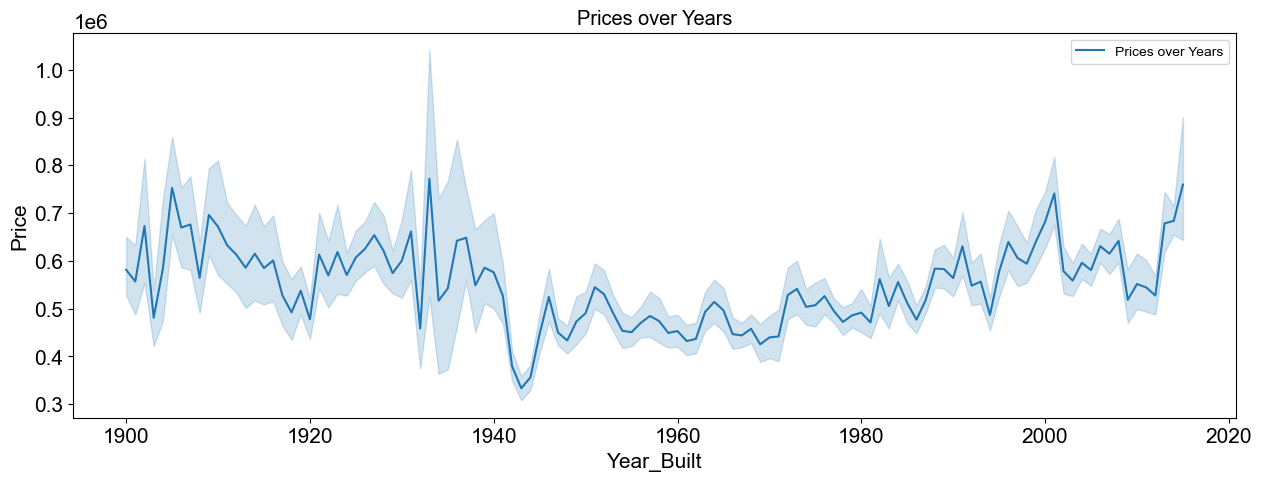

In [39]:
#This line chart to show increase in price over years
sns.lineplot( x = 'yr_built',  y = 'price',  data = King_County_Data_Copy,  label = 'Prices over Years').set_title('Prices over Years' , fontsize='x-large')
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
plt.xlabel('Year_Built', fontsize=15)
plt.ylabel('Price', fontsize=15)

Through the line chart, We conclude that price increased over years.

Text(0, 0.5, 'Frequency')

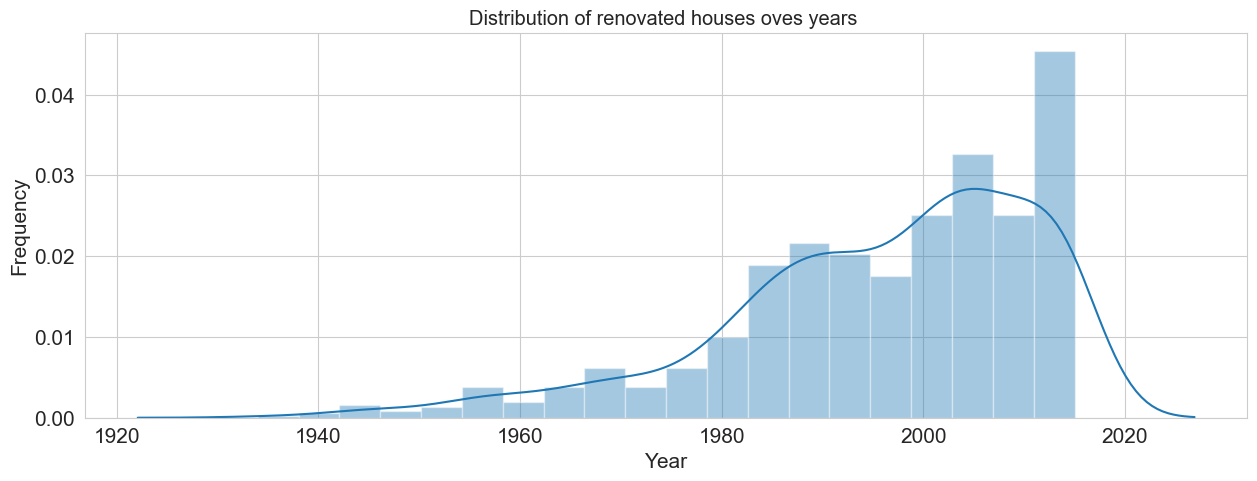

In [40]:
#This distripution plot to show the distribution of renovated houses oves years after 1900 to avoid zero values
sns.distplot(King_County_Data_Copy[King_County_Data_Copy['yr_renovated']> 1900]['yr_renovated']).set_title('Distribution of renovated houses oves years ' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

Most number of houses renovated between 2000 and 2015

Text(0, 0.5, 'Frequency')

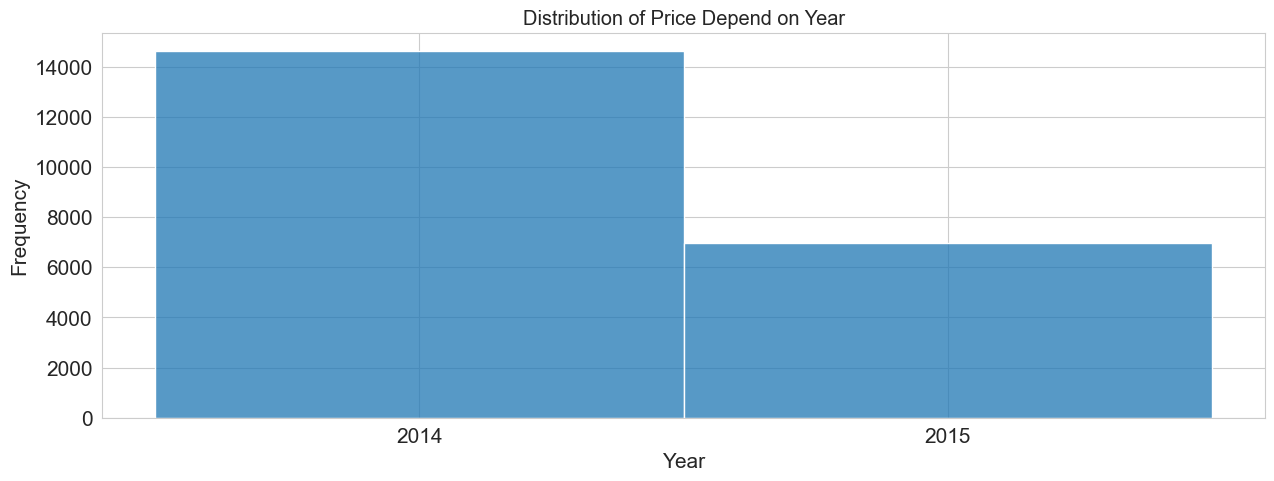

In [41]:
#This distripution plot to show the distribution of Price depend year feature
sns.histplot(King_County_Data_Copy['Year_of_sale']).set_title('Distribution of Price Depend on Year' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

2014 has the largest number of sales in comparison with 2015

Text(0, 0.5, 'Frequency')

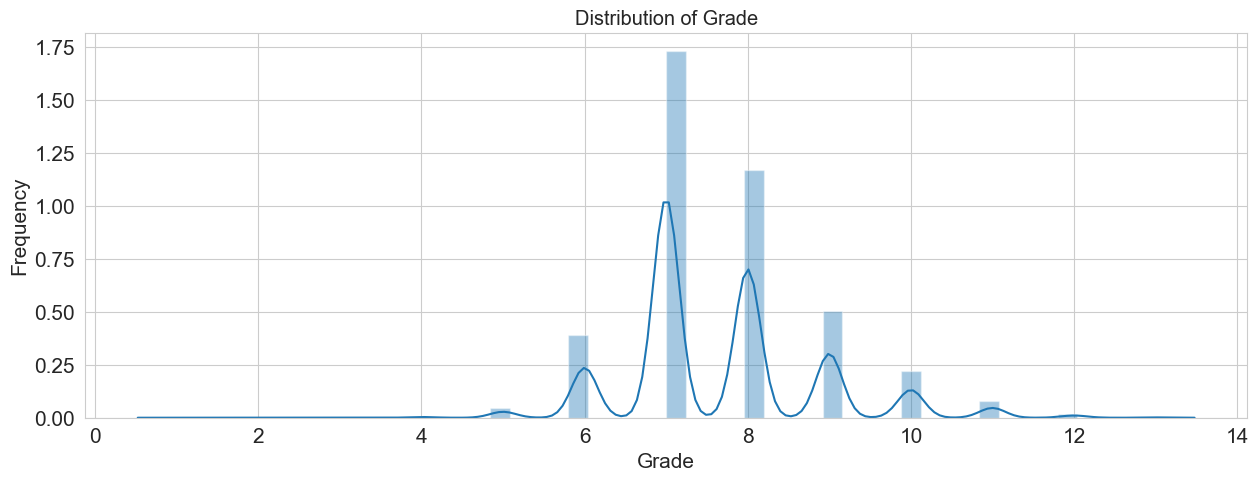

In [42]:
#This distripution plot to show the distribution of garde
sns.distplot(King_County_Data_Copy['grade']).set_title('Distribution of Grade' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

In [43]:
King_County_Data_Copy['grade'].describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

We notice that the median for grade is 7, which matches the description of being average.

In [44]:
#using describe() to describe price column anad round() to rounde the value
King_County_Data_Copy['price'].describe().round(3)

count      21613.000
mean      540088.142
std       367127.196
min        75000.000
25%       321950.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

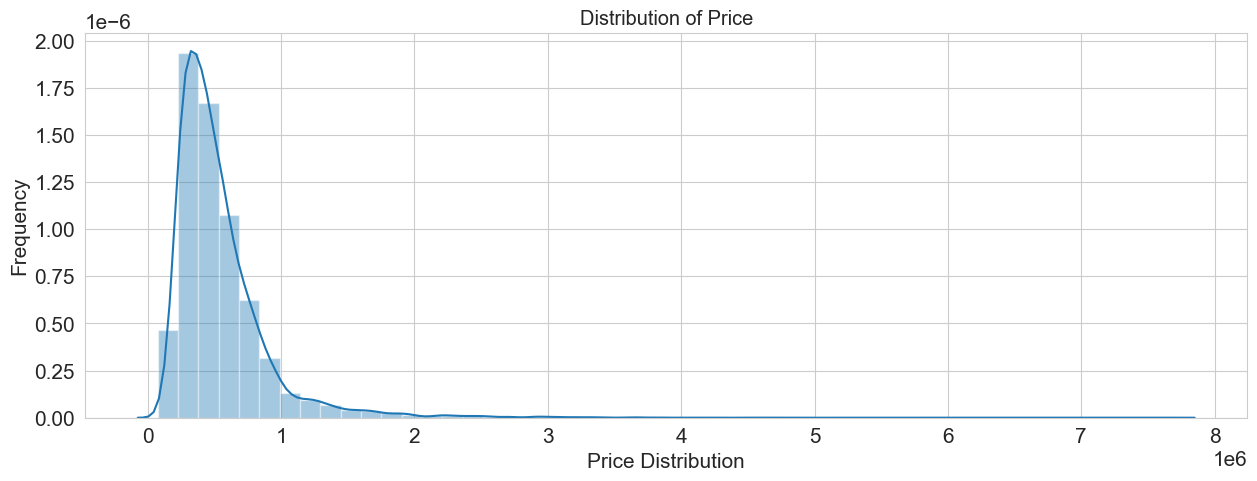

In [45]:
#This distripution plot to show the distribution of price
sns.distplot(King_County_Data_Copy['price']).set_title('Distribution of Price' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Price Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

- the median = 449950.000
- the mean = 519711.853

<a id='bai'></a>
## Bivariate  Exploration

<a id='features'></a>
## Overview of house features
### How every feature affect the house price?

In [46]:
# This function to plot all box plots 
def AllBoxPlot (df,xVar,yVar):
    
    sns.boxplot(data=King_County_Data_Copy.sort_values(by=xVar), x=yVar, y=xVar).set_title(f'{yVar} vs {xVar}' , fontsize='x-large')
# Use this code to define the boundaries of the chart
    plt.gcf().set_size_inches(14 , 8)
# Use this code to put the title and its proparities
    plt.title(f'Distribution of {yVar} by {xVar}'.title(), fontsize = 14 , weight = "bold")
# Use this code to put x and labeles and its proparities 
    plt.xlabel(yVar.title(), fontsize= 10, weight = "bold")
    plt.ylabel(xVar.title(), fontsize= 10, weight = "bold")

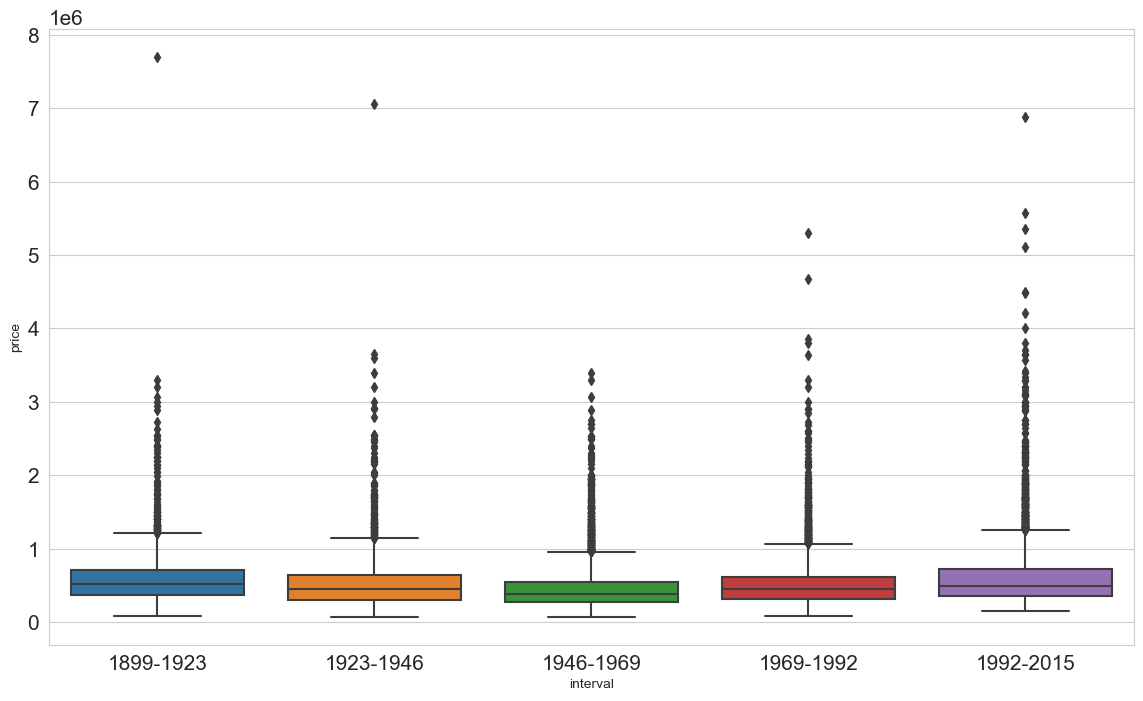

In [47]:
# This box plot to show the distribution of Price and Yr_built
sorted_data = King_County_Data_Copy.sort_values('interval', ascending=True)
# Create the box plot
sns.boxplot(x ='interval', y ='price', data=sorted_data)
plt.gcf().set_size_inches(14 , 8)
plt.show()

- the year of construction, the older it is, the lower the price.
- year_built feature appears to be a poor indicator of price.

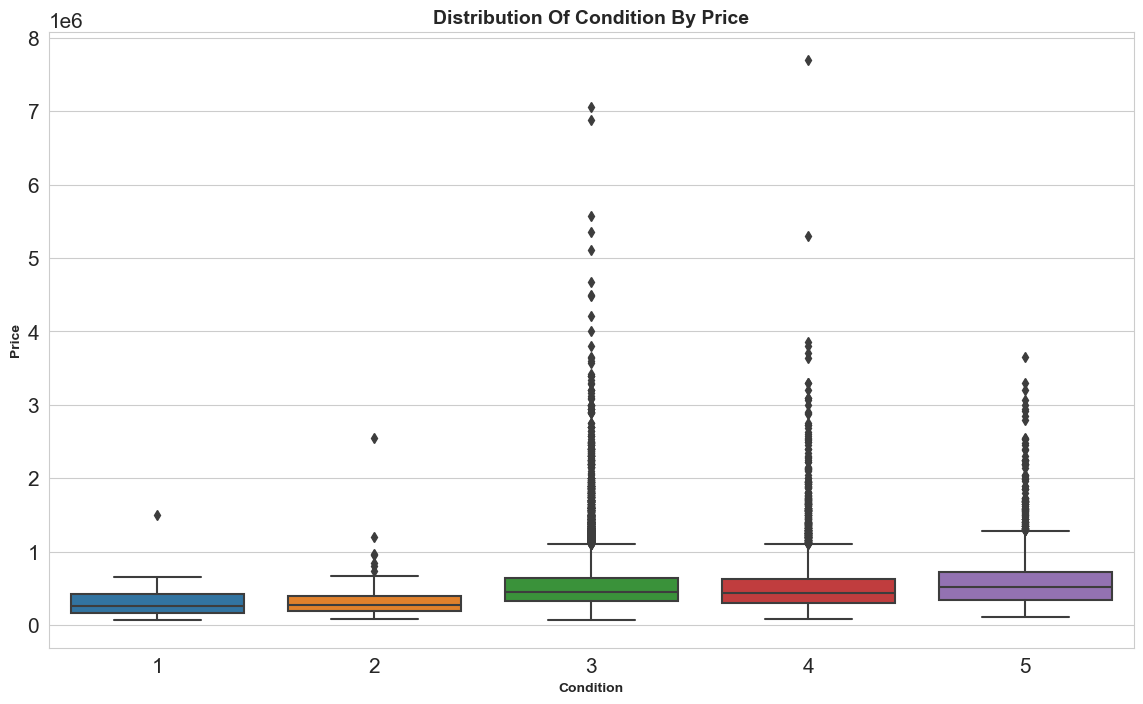

In [48]:
#This box plot to show the distribution of Price and Condition
AllBoxPlot(King_County_Data_Copy,'price','condition')

- Referring to this box plot, We can conclude that there is a positive relationship between 'price' and 'conidition',So condition feature affect the price

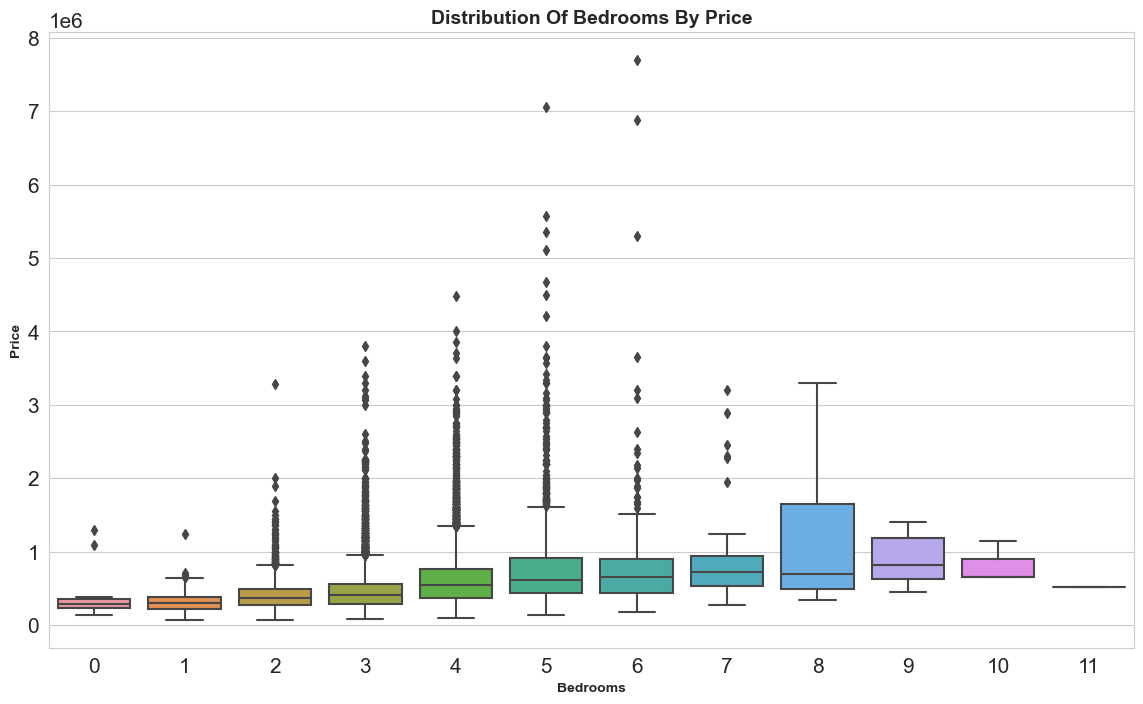

In [49]:
#This box plot to show the distribution of Price and number of bedrooms
AllBoxPlot(King_County_Data_Copy,'price','bedrooms')

- Referring to this box plot, We can conclude that there is a positive relationship between price and 'bedhrooms' while its increase, So the house price will increase
- We will apply some statistics to get in-depth insights

In [50]:
#applying some statistics to calculate the mean living square-footage and look at bedroom count for houses within 0.1 standard deviation of this mean.
dfq2bb = King_County_Data_Copy[abs(King_County_Data_Copy['sqft_living']-King_County_Data_Copy['sqft_living'].mean()) < 0.1*King_County_Data_Copy['sqft_living'].std()]
dfq2bb['sqft_living'].describe()

count    1811.000000
mean     2079.416897
std        53.916019
min      1990.000000
25%      2030.000000
50%      2080.000000
75%      2120.000000
max      2170.000000
Name: sqft_living, dtype: float64

- We conclude that :
  - We are looking at 1811 houses with living space between 1990 sq_ft and 2170 sq_ft.
  - for the houses of space between 1990 sq_ft and 2170 sq_ft, the optimal bedroom count is 8.
  - adding an additional bedroom does not necessarily affect the house price.

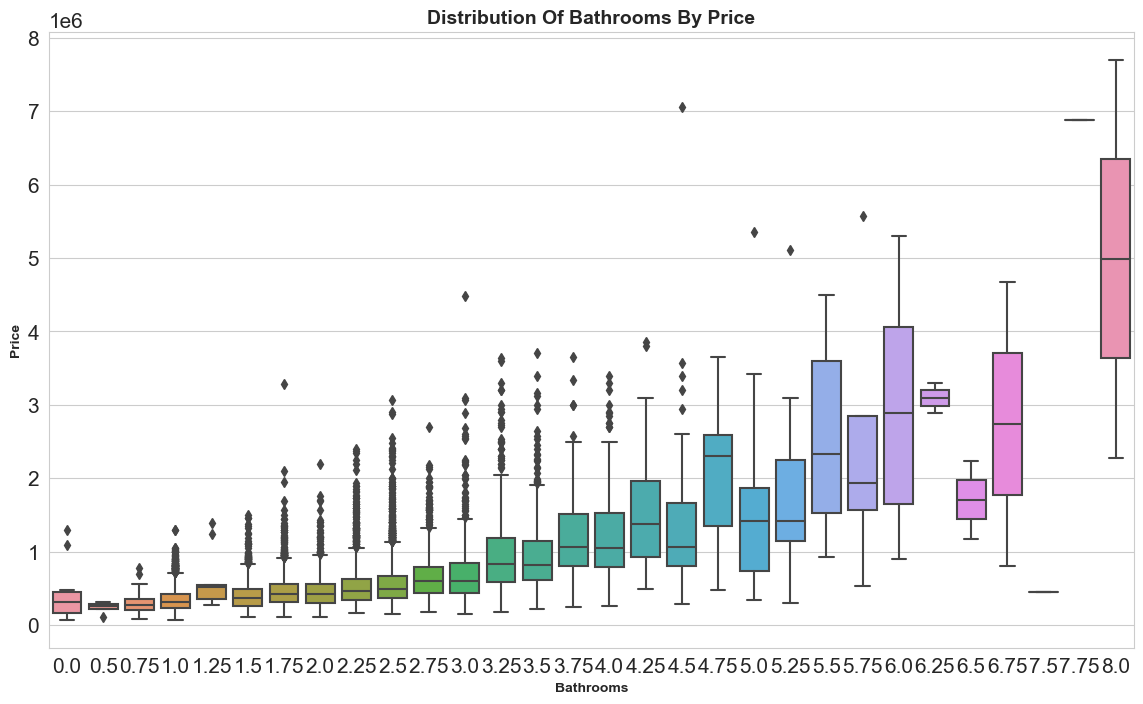

In [51]:
#This box plot to show the distribution of Price and number of bathrooms 
AllBoxPlot(King_County_Data_Copy,'price','bathrooms')

- Referring to this box plot, We can conclude that there is a positive relationship indicates between price and 'bathrooms' while its increase, So the house price will increase

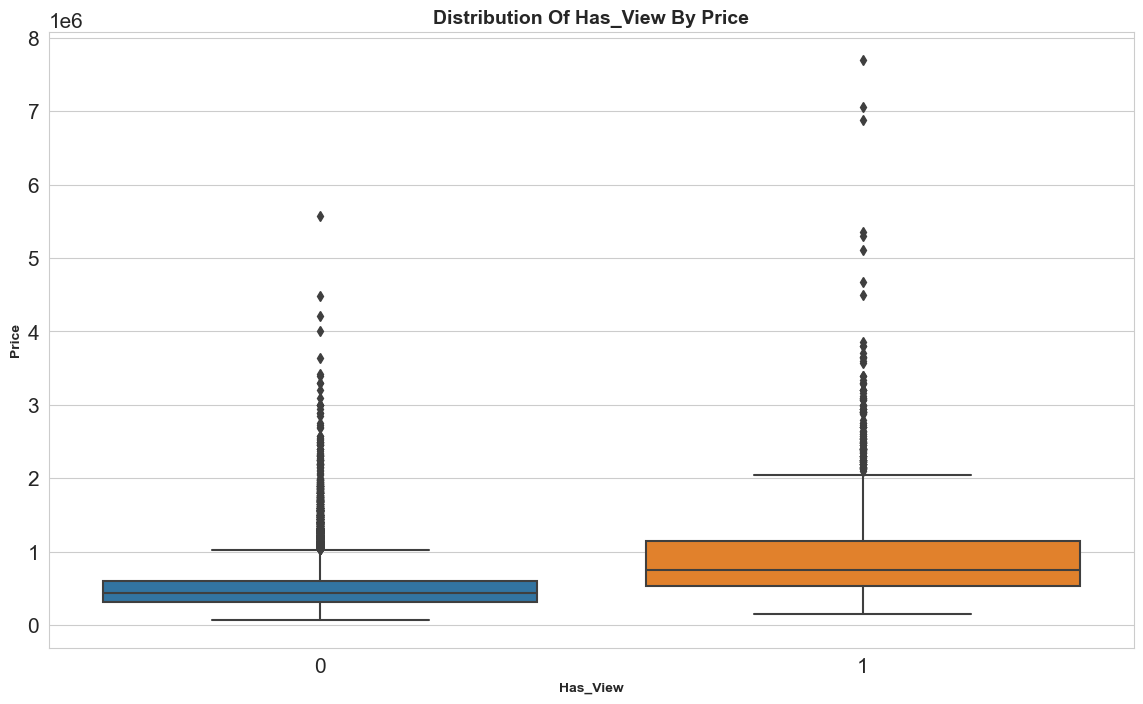

In [52]:
#This box plot to show the distribution of houses with special view and houses without view and its price
AllBoxPlot(King_County_Data_Copy,'price','has_view')

In [53]:
#The mean of price for hoses with and without water view
has_view = King_County_Data_Copy[King_County_Data_Copy['has_view'] == 1]['price'].mean()
non_has_view = King_County_Data_Copy[King_County_Data_Copy['has_view'] == 0]['price'].mean()
print(f"The mean house price for a house with view USD {round(has_view,3)}")
print(f"The mean house price for a house without view is USD {round(non_has_view,3)}")

The mean house price for a house with view USD 939447.019
The mean house price for a house without view is USD 496564.192


- a house with a view has an impact on the price of the house

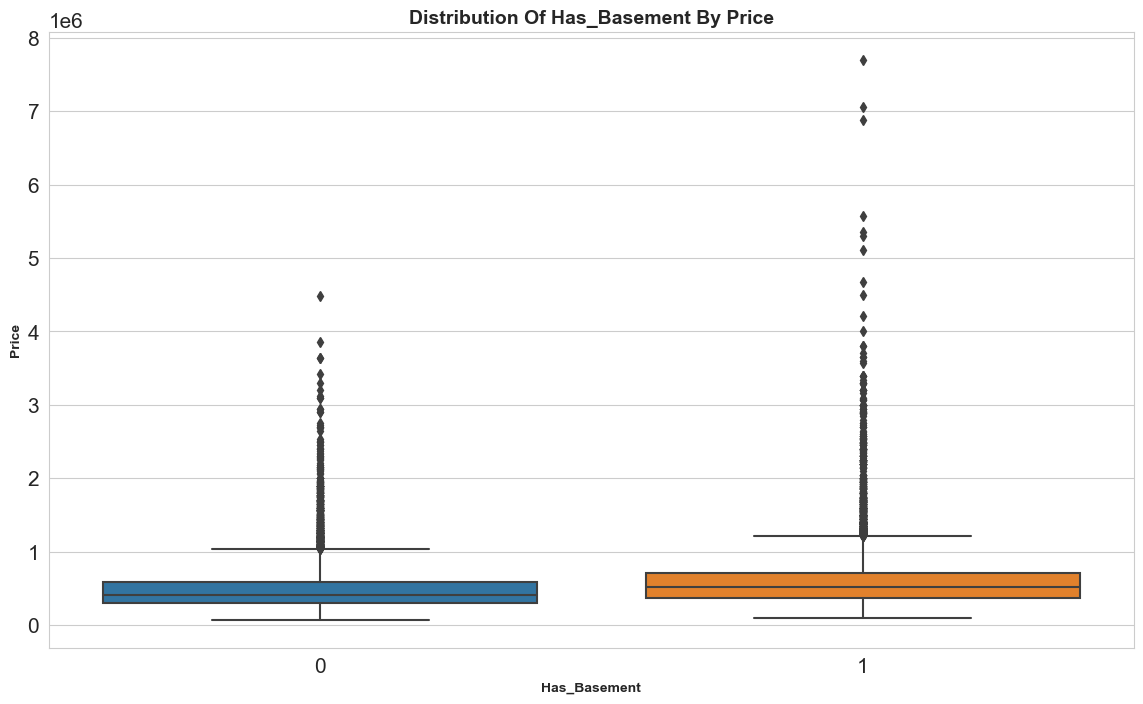

In [54]:
#This box plot to show the distribution houses with basement and without basement and its price
AllBoxPlot(King_County_Data_Copy,'price','has_basement')

In [55]:
#The mean of price for hoses with and without water view
has_basement = King_County_Data_Copy[King_County_Data_Copy['has_basement'] == 1]['price'].mean()
non_has_basement = King_County_Data_Copy[King_County_Data_Copy['has_basement'] == 0]['price'].mean()
print(f"The mean house price for a house with basement USD {round(has_basement,3)}")
print(f"The mean house price for a house without basement is USD {round(non_has_basement,3)}")

The mean house price for a house with basement USD 622373.564
The mean house price for a house without basement is USD 486884.091


- A house with a basement has an impact on the price of the house

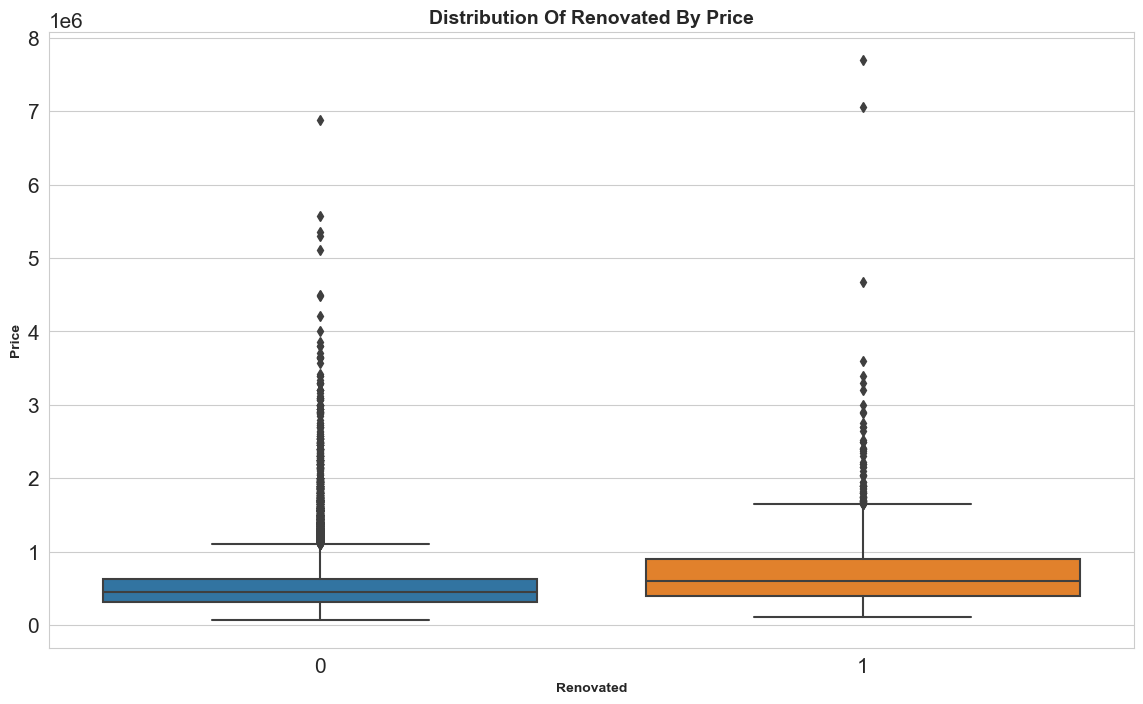

In [56]:
# This box plot to show the distribution houses thar renovated and the houses that not renovated and its price
AllBoxPlot(King_County_Data_Copy,'price','Renovated')  

In [57]:
#The mean of price for hoses with and without water view
renovated = King_County_Data_Copy[King_County_Data_Copy['Renovated'] == 1]['price'].mean()
not_renovated = King_County_Data_Copy[King_County_Data_Copy['Renovated'] == 0]['price'].mean()
print(f"The mean house price for a house that renovated is USD {round(renovated,3)}")
print(f"The mean house price for a house that not renovated is USD {round(not_renovated,3)}")

The mean house price for a house that renovated is USD 760379.03
The mean house price for a house that not renovated is USD 530360.818


- A house which was renovated has an impact on the price of the house

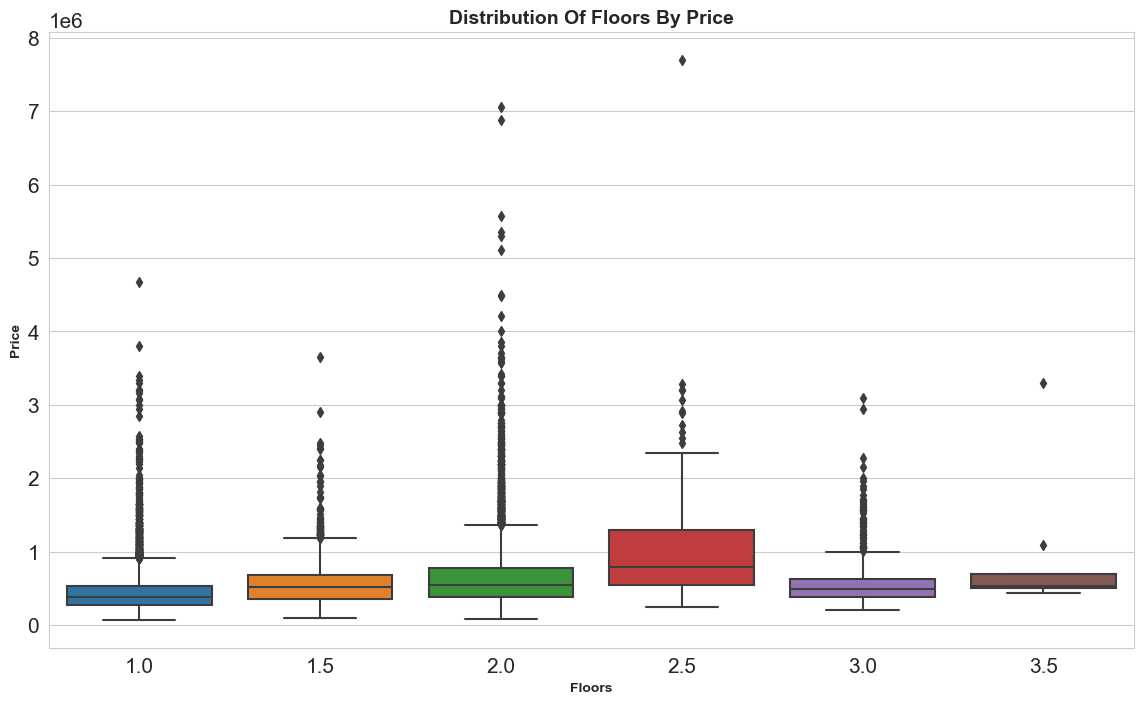

In [58]:
#This box plot to show the distribution price and number of floors
AllBoxPlot(King_County_Data_Copy,'price','floors')  

- Referring to this box plot, We can conclude that the most there is a positive preferable floor up to 2.5
- 0.5 refer to balcon
- house with 3 floors has a lower median price.

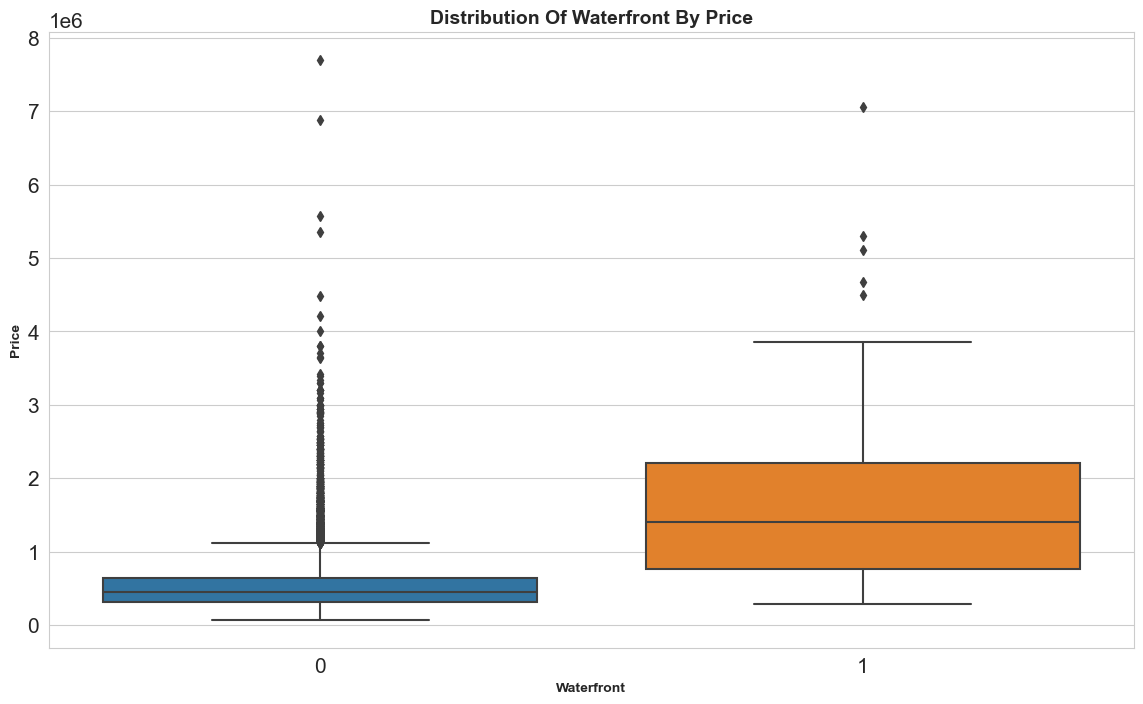

In [59]:
#This box plot to show the distribution houses with waterfront view and without waterfront view and its price
AllBoxPlot(King_County_Data_Copy,'price','waterfront')  

In [60]:
#The mean of price for hoses with and without water view
waterfrontmean = King_County_Data_Copy[King_County_Data_Copy['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = King_County_Data_Copy[King_County_Data_Copy['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house that waterfront is USD {round(waterfrontmean,3)}")
print(f"The mean house price for a house that not waterfront is USD {round(nonwaterfrontmean,3)}")

The mean house price for a house that waterfront is USD 1661876.025
The mean house price for a house that not waterfront is USD 531563.6


In [61]:
# Check the median house prices with waterFront view
print(len(King_County_Data_Copy[King_County_Data_Copy['waterfront'] == 1])/len(King_County_Data_Copy)*100)

0.7541757275713691


- The median house price for houses with a waterfront view is almost double
- 0.75% of properties in our dataset have a waterfront view

<a id='garde'></a>
### What is the building grade and how does it affect price?

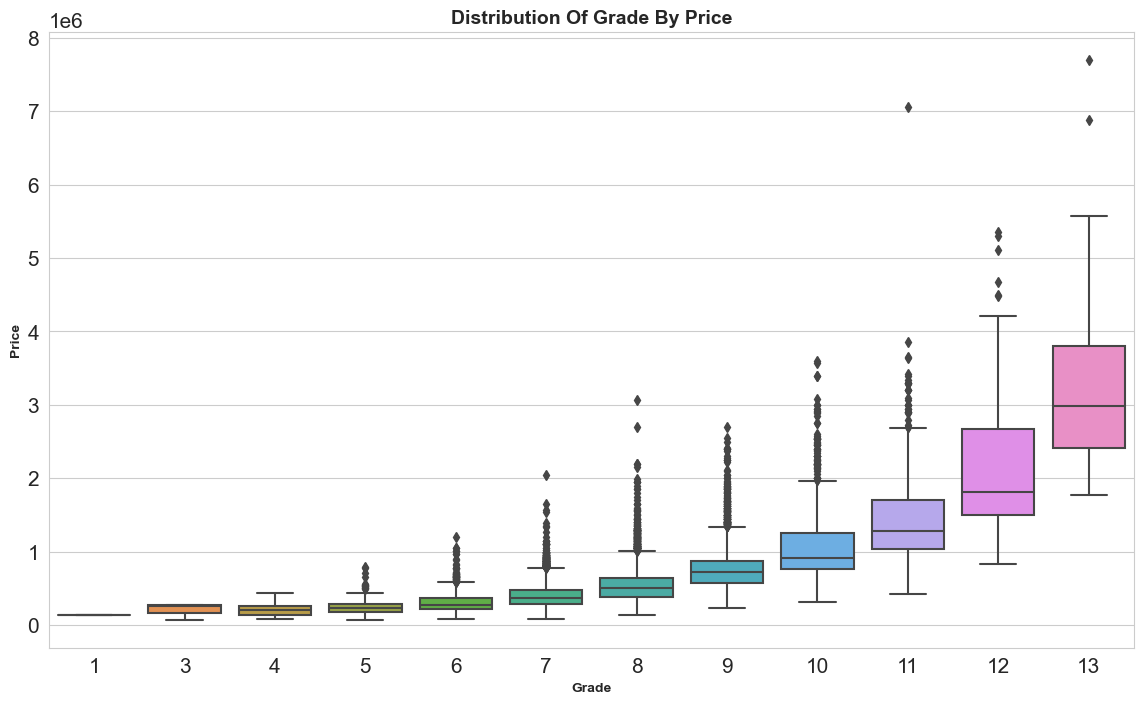

In [62]:
#This box plot to show the distribution of Price and Grade
AllBoxPlot(King_County_Data_Copy,'price','grade')

#### Building grade is a feature from King County government and represents the construction quality of improvements. Details were found [Click here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b) and reproduced below. Grades run from grade 1 to 13. Generally defined as:

 - 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
 - 4 Generally older, low quality construction. Does not meet code.
 - 5 Low construction costs and workmanship. Small, simple design.
 - 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
 - 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
 - 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
 - 9 Better architectural design with extra interior and exterior design and quality.
 - 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the      floor plans. Generally have a larger square footage.
 - 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious        options.
 - 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
 - 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry    ways etc.

- Referring to the box plot the median house price increases with grade. which indicates that these features are positively correlated.

##### and this what  we get exactlly from our statistics

In [63]:
#Using describe to chech statistical values
King_County_Data_Copy['grade'].describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

<a id='large_lot'></a>
### How important is a large lot?

In [64]:
#This function to plot all Scatter plots 
def AllScatters (df,xVar,yVar):
# Using sns.scatter to plot a scatter that describe the relation between dependent variables and independent variables
    sns.scatterplot(data=King_County_Data_Copy.sort_values(by=xVar), x=yVar, y=xVar).set_title(f'{yVar} vs {xVar}' , fontsize='x-large')
    
# Using sns.regplot to plot the red line through data points 
    sns.regplot(data=King_County_Data_Copy, x=yVar, y=xVar,line_kws={'color':'red'})

#Use this code to define the boundaries of the chart
    plt.gcf().set_size_inches(14 , 8)
#Use this code to put the title and its proparities
    plt.title(f' {yVar} Vs {xVar} in USD$'.upper(), fontsize=14, weight="bold")
#Use this code to put x and labeles and its proparities 
    plt.xlabel(yVar.title(), fontsize= 10, weight = "bold")
    plt.ylabel(xVar.title(), fontsize= 10, weight = "bold")

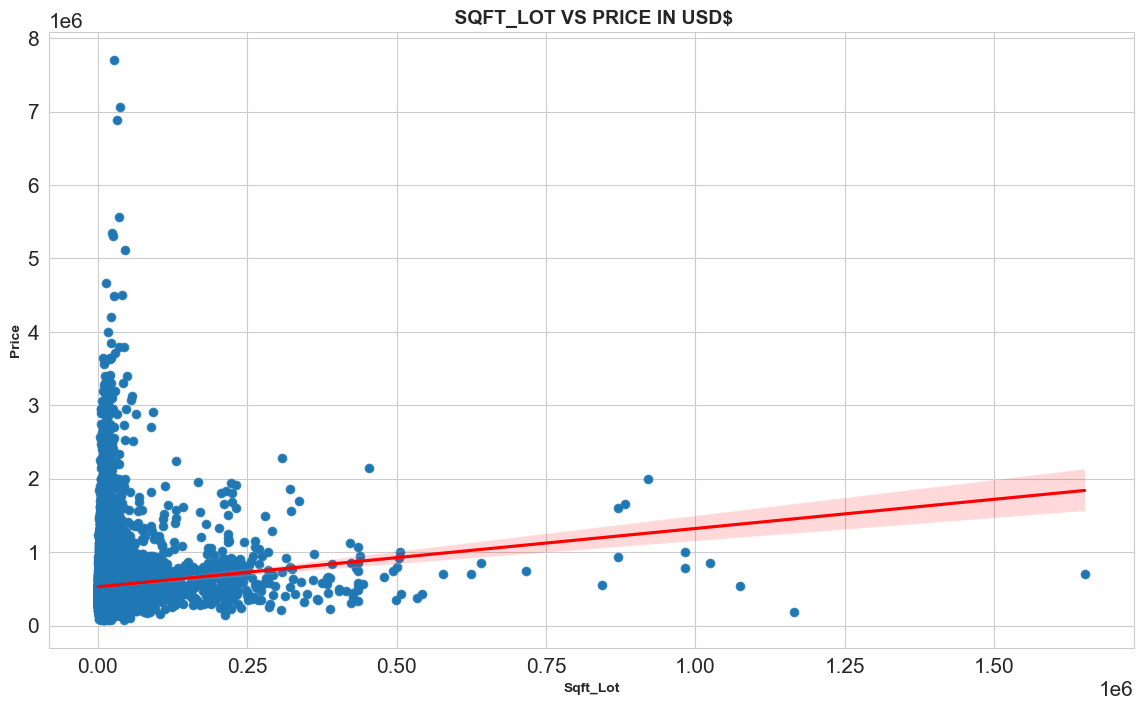

In [65]:
# This Scatter th show the relation between price and sqft_lot
AllScatters(King_County_Data_Copy,"price","sqft_lot")

#### We will make some calculations to get in-depth insights
##### So, We will define a ratio of sqft_living over sqft_lot to understand if there is an ideal trade-off between lot size and living space.

In [66]:
# Define ratio to get in-depth insights
#to understand if there is relation between lot size and living space
King_County_Data_Copy['living_per_lot']= King_County_Data_Copy['sqft_living']/King_County_Data_Copy['sqft_lot']
# Describe ratio
King_County_Data_Copy['living_per_lot'].describe()

count    21613.000000
mean         0.323745
std          0.268565
min          0.000610
25%          0.156581
50%          0.247664
75%          0.407547
max          4.653846
Name: living_per_lot, dtype: float64

In [67]:
# Get number of houses with ratio over 1
len(King_County_Data_Copy[King_County_Data_Copy['living_per_lot'] >1])

789

- There are 789 houses with greater value for sqft_living.
- Also we will imagine that sqft_living to be smaller than sqft_lot. So we have 788 with ratio over 1

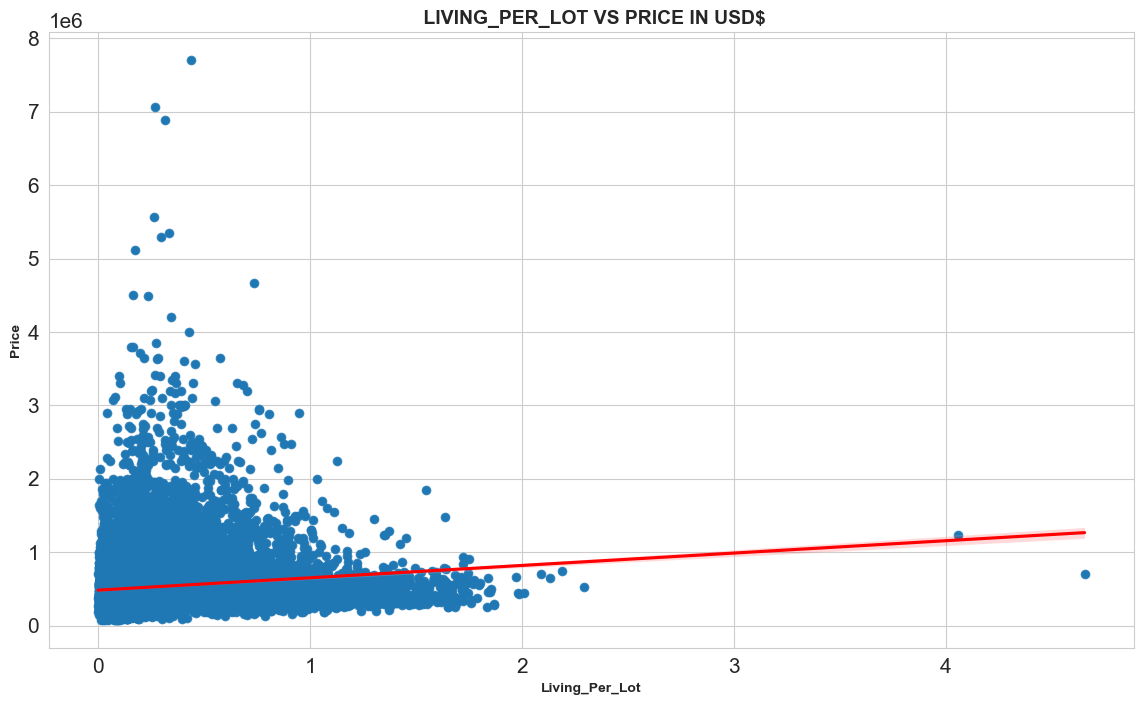

In [68]:
# This Scatter th show the relation between price and living_per_lot
AllScatters(King_County_Data_Copy,"price","living_per_lot")

- The joint plot shows that there is no relationship between the ratio and price
- We can conclude that there is other factors are more important
- for example,small houses without lot [out door space] and in a desirable location might get a higher price than a house with a large lot in a lower location

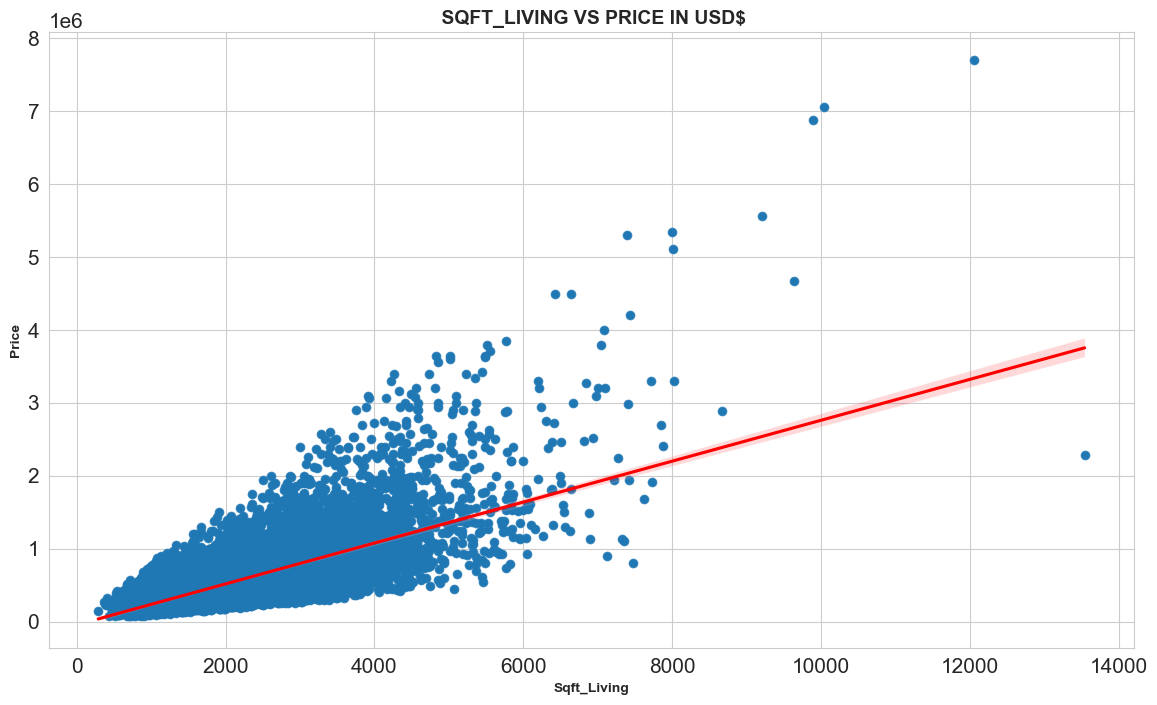

In [69]:
# This Scatter th show the relation between price and sqft_living
AllScatters(King_County_Data_Copy,"price","sqft_living")

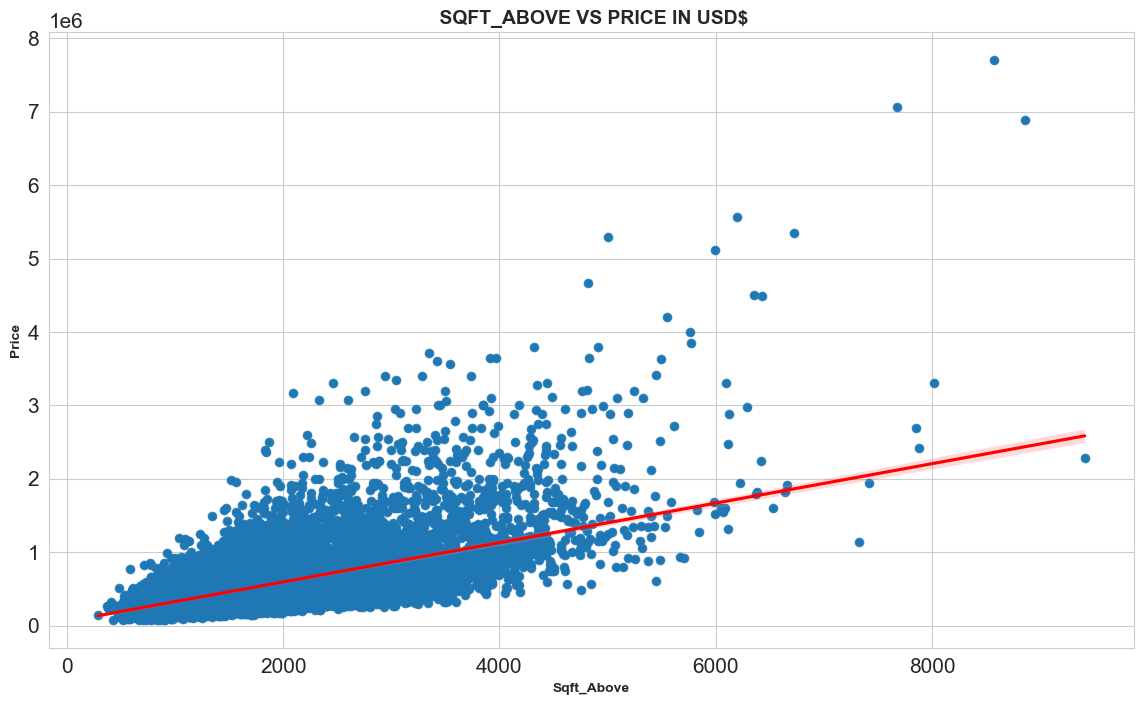

In [70]:
# This Scatter th show the relation between price and sqft_above
AllScatters(King_County_Data_Copy,"price","sqft_above")

- The scatter plots above shows that :
  - all features appear somewhat linearity
  - strong relationship between 'sqft_living' and 'price' which means The more living space, the higher the price
  - strong relationship between 'sqft_above' and 'price' which means The more above space, the higher the price

. Note that we won't keep all the sqft-type features for our model due to them likely being correlated. This will be explored further in the multicollinearity section below. Note that sqft_living and sqft_above look to be most appropriate due to demonstrating greater linearity with respect to our target feature, whereas sqft_lot is the least linear.

<a id='multi'></a>
## Multivariate   Exploration

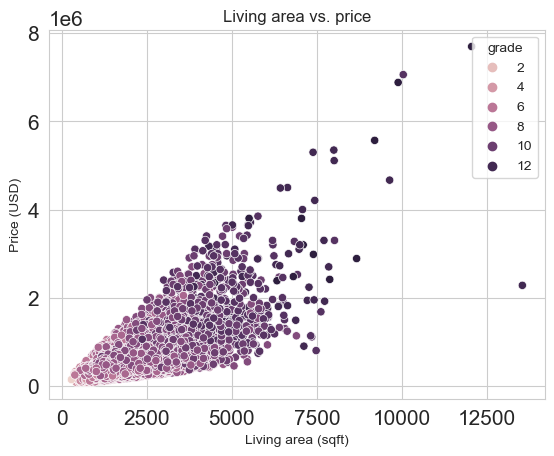

In [71]:
# Scatter plot of sqft living vs price with hue grade
sns.scatterplot(x = King_County_Data_Copy['sqft_living'], y = King_County_Data_Copy['price'], hue = King_County_Data_Copy['grade'], data = King_County_Data_Copy)
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

- Referring to the scatter plot, there is a clear relationship between grade and living area
- The lower grade houses also have a small square footage
-  Once a house has a living area of at least 2000 sqft, it is most likely to be average or above-average in terms of grade.

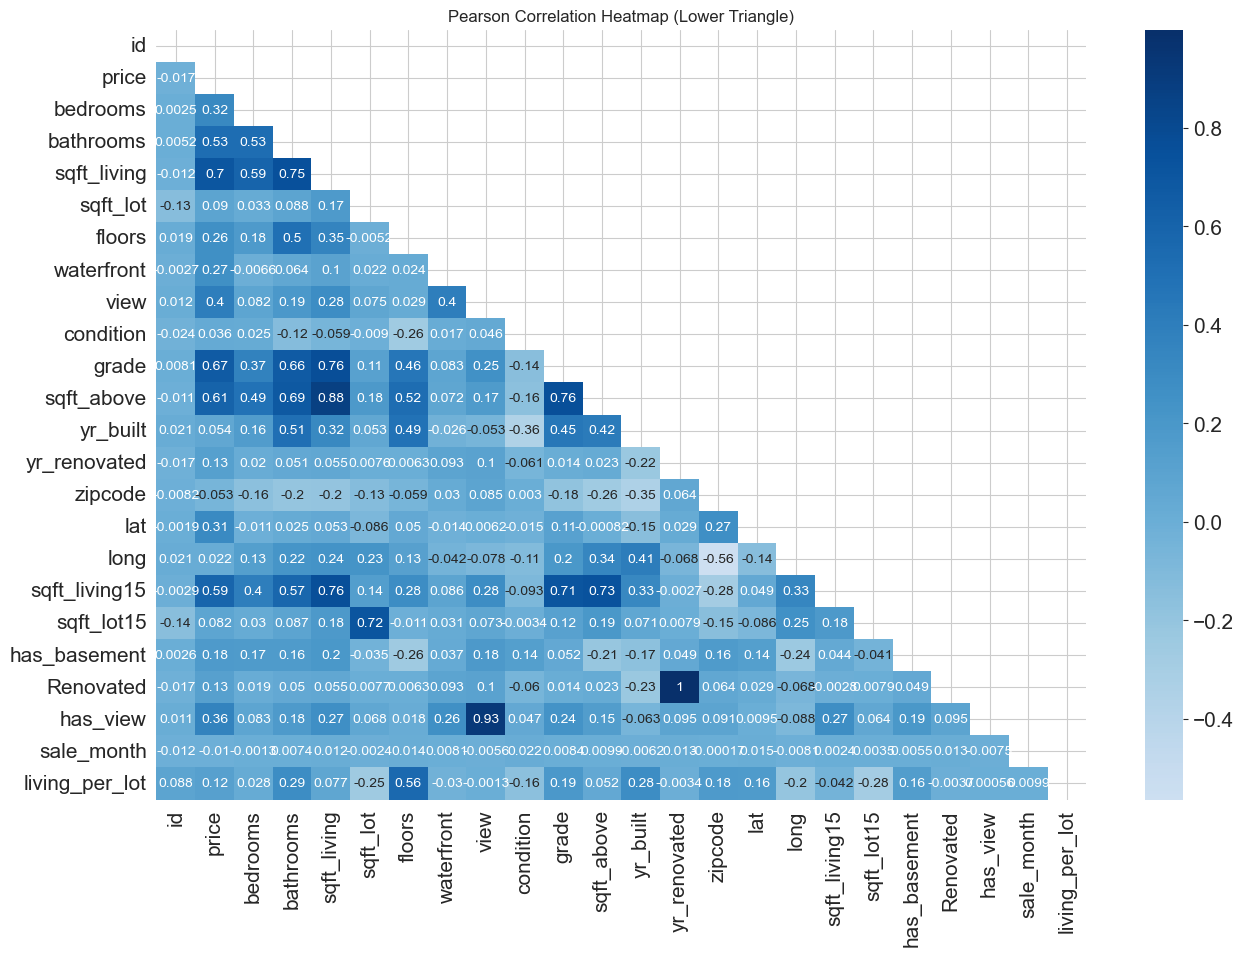

In [72]:
# Calculate the correlation corr() function 
corr = King_County_Data_Copy.corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(corr))

# set figure size
plt.figure(figsize=(15, 10))

# Creating heat map wiith mask 
sns.heatmap(corr, mask=mask, center=0, annot=True, cmap='Blues')

# Set the title
plt.title('Pearson Correlation Heatmap (Lower Triangle)')

# show() the plot
plt.show()

- Correlation between sqft_living  and price = 0.70 it is a very strong relationship which means the house with a large living square footage has a higher price
- Correlation between sqft_above  and price = 0.59 it is a strong relationship which means the house with a large above square footage has a higher price.

     'sqft_above is the square footage of the house apart from basement, and as we know that most of the houses didn't 
       have a basement. We decided to drop this feature'

<a id='Q2'></a>
## How the time factor affect the sale prices?

<a id='Qua'></a>
### What is the  quarter with highiest sales?

Text(0, 0.5, 'Frequency')

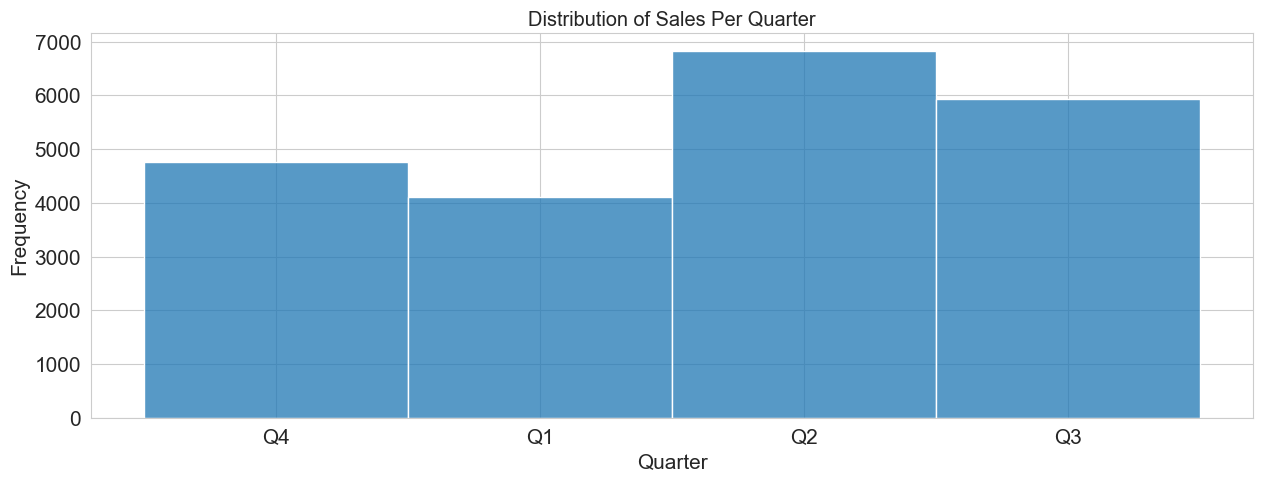

In [73]:
#This distripution plot to show the distribution of sales per quarter
sns.histplot(King_County_Data_Copy['sale_quarter']).set_title('Distribution of Sales Per Quarter' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

In [74]:
df3 = King_County_Data_Copy.copy()
df3['sale_quarter'].value_counts()/len(df3)

Q2    0.315782
Q3    0.274141
Q4    0.220238
Q1    0.189839
Name: sale_quarter, dtype: float64

- We conclude that there is a high percentage of sales amongst quarters :
   - Q2 and Q3 being most popular.
   - Q2 with rate of 31%
   - Q3 with 27% 
   - The total for Q2 and Q3 = 58%

<a id='mon'></a>
### What is disrtibution of the month with highiest pecentage sales?

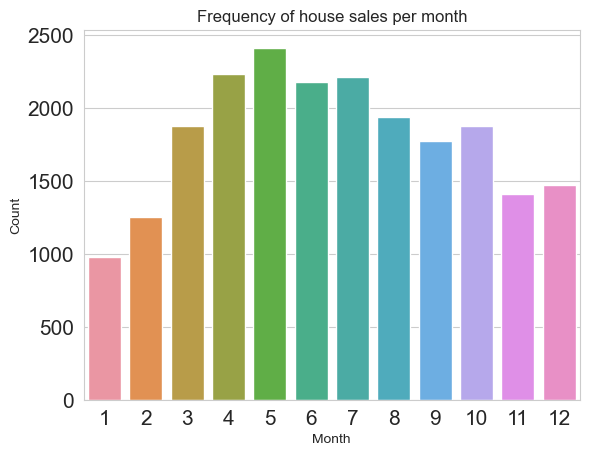

In [75]:
# Countplot of sale_month
sns.countplot(x = King_County_Data_Copy['sale_month'], data = King_County_Data_Copy)
plt.title('Frequency of house sales per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

- April and May are the months highiest number of sales
- January and February have the lowest number of sales.

In [76]:
# calculate the distribution of sales per month
df3 = King_County_Data_Copy.copy()
df3['sale_month'].value_counts()/len(df3)

5     0.111692
4     0.103225
7     0.102300
6     0.100865
8     0.089761
10    0.086892
3     0.086753
9     0.082080
12    0.068061
11    0.065285
2     0.057836
1     0.045251
Name: sale_month, dtype: float64

In [77]:
# Filter the dataset for the desired time period
start_date = pd.to_datetime('2014-05-01')
end_date = pd.to_datetime('2015-05-31')
filtered_df = King_County_Data_Copy[(King_County_Data_Copy['date'] >= start_date) & (King_County_Data_Copy['date'] <= end_date)]

# Calculate the number of homes sold each month
homes_sold_per_month = filtered_df['date'].dt.to_period('M').value_counts().sort_index()

# Print the number of homes sold each month
for month, num_homes_sold in homes_sold_per_month.iteritems():
    print(f"Homes sold in {month}: {num_homes_sold}")

Homes sold in 2014-05: 1768
Homes sold in 2014-06: 2180
Homes sold in 2014-07: 2211
Homes sold in 2014-08: 1940
Homes sold in 2014-09: 1774
Homes sold in 2014-10: 1878
Homes sold in 2014-11: 1411
Homes sold in 2014-12: 1471
Homes sold in 2015-01: 978
Homes sold in 2015-02: 1250
Homes sold in 2015-03: 1875
Homes sold in 2015-04: 2231
Homes sold in 2015-05: 646


In [78]:
# Calculate the average price for each month
#average_price_per_month = filtered_df.groupby(filtered_df['date'].dt.to_period('M'))['price'].mean()

# Print the average price for each month
#for month, avg_price in average_price_per_month.iteritems():
 #   print(f"Average price in {month}: {avg_price}")


In [79]:
# Calculate the average price for each month
average_price_per_month = filtered_df.groupby(filtered_df['date'].dt.to_period('M'))['price'].mean()

# Print the rounded average price for each month
for month, avg_price in average_price_per_month.iteritems():
    rounded_avg_price = round(avg_price, 2)
    print(f"Average price in {month}: {rounded_avg_price}")

Average price in 2014-05: 548080.28
Average price in 2014-06: 558002.2
Average price in 2014-07: 544788.76
Average price in 2014-08: 536445.28
Average price in 2014-09: 529253.82
Average price in 2014-10: 539026.97
Average price in 2014-11: 521961.01
Average price in 2014-12: 524461.87
Average price in 2015-01: 525870.89
Average price in 2015-02: 507851.37
Average price in 2015-03: 543977.19
Average price in 2015-04: 561837.77
Average price in 2015-05: 558126.81


<a id='hyp'></a>
## Hypothesis Testing

#### - Is there a significant difference in the mean house prices between houses with waterfront view and houses without waterfront view?

- Null hypothesis (H0): There is no significant difference in the mean house prices between houses with waterfront view and houses without waterfront view.

- Alternative hypothesis (H1): There is a significant difference in the mean house prices between houses with waterfront view and houses without waterfront view.

In [80]:
# It filters the dataset based on the condition price of houses with waterfront and without waterfront 
price_with_waterfront = King_County_Data_Copy[King_County_Data_Copy['waterfront'] == 1]['price']
price_without_waterfront = King_County_Data_Copy[King_County_Data_Copy['waterfront'] == 0]['price']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(price_with_waterfront, price_without_waterfront)

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 40.62589119977304
p-value: 0.0


- A smaller p-value indicates stronger evidence against the null hypothesis
- A larger p-value suggests weaker evidence against the null hypothesis.
- if p-value = 0 this means that the observed data is highly unlikely to occur by random chance alone. Therefore, you would typically reject the null hypothesis and conclude that there is a significant difference or relationship present in the data.

In [81]:
# Compare p-value with given significance level and print whether the null hypothesis is rejected or cannot be rejected 
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

Null hyphothesis rejected


<a id='extract'></a>
## Feature Extraction

In [82]:
# Define function to remove unecessary columns and highly correlated 
def removecols(King_County_Data_Copy):
    King_County_Data_Copy = King_County_Data_Copy.drop(['id', 'date','sqft_living15','sqft_lot15','sqft_above','living_per_lot'], axis = 1)
    return King_County_Data_Copy

In [83]:
# Apply to df
King_County_Data_Copy = removecols(King_County_Data_Copy)

In [84]:
# Save a csv copy
King_County_Data_Copy.to_csv('King_County_Data_Copy.csv')
# View head
King_County_Data_Copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,has_basement,Year_of_sale,Renovated,interval,has_view,sale_month,sale_quarter
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,0,2014,0,1946-1969,0,10,Q4
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1,2014,1,1946-1969,0,12,Q4
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,0,2015,0,1923-1946,0,2,Q1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1,2014,0,1946-1969,0,12,Q4
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,0,2015,0,1969-1992,0,2,Q1


In [85]:
#making another copy of data frame to apply feature extraction model
King_County_Data_Copy2 = King_County_Data_Copy.copy()
King_County_Data_Copy2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,has_basement,Year_of_sale,Renovated,interval,has_view,sale_month,sale_quarter
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,0,2014,0,1946-1969,0,10,Q4
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1,2014,1,1946-1969,0,12,Q4
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,0,2015,0,1923-1946,0,2,Q1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1,2014,0,1946-1969,0,12,Q4
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,0,2015,0,1969-1992,0,2,Q1


In [86]:
# This function to drop data of type string because it can not be processed in feature extraction process
# 'Year_of_sale','sale_quarter','interval' , 'sale_month' we generate these column just to get indepth insight about the dataset
# 'yr_renovated' we convert this column 'renovated' to bolean 0's and 1's because not all houses were renovated
def drop_corrfeats(King_County_Data_Copy2):
    King_County_Data_Copy2 = King_County_Data_Copy2.drop(['Year_of_sale','sale_quarter','interval', 'sale_month','yr_renovated'], axis = 1)
    return King_County_Data_Copy2

In [87]:
#apply 'drop_corrfeats function to  drop string data type
King_County_Data_Copy2 = drop_corrfeats(King_County_Data_Copy2)

In [88]:
#using info() to check data type
King_County_Data_Copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  yr_built      21613 non-null  int64  
 11  zipcode       21613 non-null  int64  
 12  lat           21613 non-null  float64
 13  long          21613 non-null  float64
 14  has_basement  21613 non-null  int64  
 15  Renovated     21613 non-null  int64  
 16  has_view      21613 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 2.8 MB


In [89]:
#generate new copy of data frame to apply feature extraction model on it
King_County_Data_Copy3 = King_County_Data_Copy2.copy()
King_County_Data_Copy3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,has_basement,Renovated,has_view
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319,1,1,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045,0,0,0


In [90]:
#We use 'StandScaler' preprocessing technique to standardize features
scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
King_County_Data_Copy3.loc[:, King_County_Data_Copy3.columns != 'price'] = scaler.fit_transform(
    King_County_Data_Copy3.loc[:, King_County_Data_Copy3.columns != 'price'])

In [91]:
#split the data into testing and training dataset 
X_train, X_test, y_train, y_test = train_test_split(
    King_County_Data_Copy3.drop('price', axis=1), King_County_Data_Copy3[['price']], 
    test_size=0.20, random_state=0)

In [92]:
#apply desicion tree regressor 
#max_depth to set the maximum depth of the decision tree to 14 level
#min_simple_split to ets the minimum number of samples required to split an internal node. here it's 5 samples
#max_feature set the maximum number of features to consider when looking for the best split
model = DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)

In [93]:
#performs a grid search using cross-validation (GridSearchCV) to find the best hyperparameters for a DecisionTreeRegressor model
parameter_space = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}
#GridSearchCV performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a given estimator
clf = GridSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 15], 'max_features': [30, 45],
                         'min_samples_split': [5, 10]},
             scoring='neg_mean_absolute_error')

In [94]:
#performs a RandomizedSearchCV to find the best parameters for a DecisionTreeRegressor model
# based on the provided parameter_space. It then creates a new estimator using the best parameters and fits the model to the training data

clf = RandomizedSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, scoring="neg_mean_absolute_error", n_iter=100)

# Fit the RandomizedSearchCV object to your data
clf.fit(X_train, y_train)

# Access the best parameters
best_params = clf.best_params_

# Create a new estimator with the best parameters
best_estimator = DecisionTreeRegressor(**best_params)

# Fit the best estimator to the data
best_estimator.fit(X_train, y_train)

#  prints the feature importances of the trained model
feature_importances = best_estimator.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: bedrooms, Importance: 0.0018404883756970285
Feature: bathrooms, Importance: 0.005677576082640408
Feature: sqft_living, Importance: 0.2779574883275976
Feature: sqft_lot, Importance: 0.0182920736482748
Feature: floors, Importance: 0.0016569287836284085
Feature: waterfront, Importance: 0.04201362052496565
Feature: view, Importance: 0.008100267692464639
Feature: condition, Importance: 0.0031138490518727003
Feature: grade, Importance: 0.3549172546169077
Feature: yr_built, Importance: 0.01702131385243533
Feature: zipcode, Importance: 0.01570676128210748
Feature: lat, Importance: 0.1755545445146629
Feature: long, Importance: 0.07497496717997401
Feature: has_basement, Importance: 0.0005096538867231094
Feature: Renovated, Importance: 0.0010775756867773011
Feature: has_view, Importance: 0.0015856364932708782


In [95]:
#sort the features in an ascending oreder
sorted_indices = np.argsort(feature_importances)
for idx in sorted_indices:
    feature = X_train.columns[idx]
    importance = feature_importances[idx]
    print(f"Feature: {feature}, Importance: {importance}")

Feature: has_basement, Importance: 0.0005096538867231094
Feature: Renovated, Importance: 0.0010775756867773011
Feature: has_view, Importance: 0.0015856364932708782
Feature: floors, Importance: 0.0016569287836284085
Feature: bedrooms, Importance: 0.0018404883756970285
Feature: condition, Importance: 0.0031138490518727003
Feature: bathrooms, Importance: 0.005677576082640408
Feature: view, Importance: 0.008100267692464639
Feature: zipcode, Importance: 0.01570676128210748
Feature: yr_built, Importance: 0.01702131385243533
Feature: sqft_lot, Importance: 0.0182920736482748
Feature: waterfront, Importance: 0.04201362052496565
Feature: long, Importance: 0.07497496717997401
Feature: lat, Importance: 0.1755545445146629
Feature: sqft_living, Importance: 0.2779574883275976
Feature: grade, Importance: 0.3549172546169077


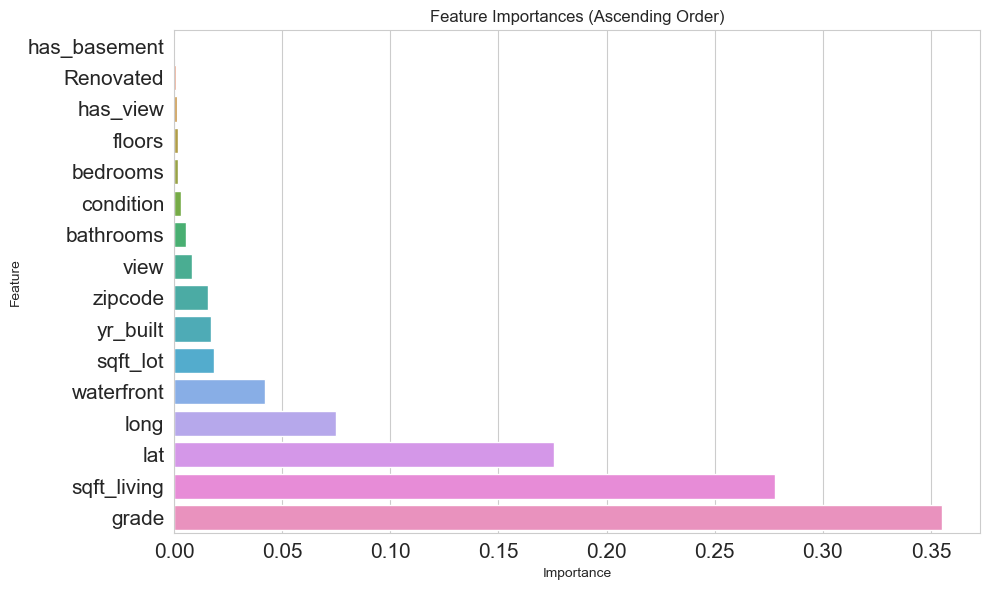

In [96]:
#'feature_importances' contains the importance values of each feature
#'feature_names' contains the corresponding feature names.
feature_importances = best_estimator.feature_importances_
feature_names = X_train.columns

# Create a DataFrame from feature-importance pairs
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in ascending order
sorted_df = importance_df.sort_values('Importance', ascending=True)

# plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Ascending Order)')
plt.tight_layout()
plt.show()

In [97]:
# Save the Data that contains features that will be used in regression models
King_County_Data_Copy3.to_csv('King_County_Data_Updated.csv')

In [98]:
King_County_Data_Copy3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,has_basement,Renovated,has_view
0,221900.0,-0.406913,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.544898,1.870152,-0.352572,-0.306079,-0.804102,-0.210135,-0.330128
1,538000.0,-0.406913,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.681079,0.879568,1.161568,-0.746341,1.243624,4.758845,-0.330128
2,180000.0,-1.508303,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.293892,-0.933388,1.283537,-0.135655,-0.804102,-0.210135,-0.330128
3,604000.0,0.694478,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.204446,1.085160,-0.283288,-1.271816,1.243624,-0.210135,-0.330128
4,510000.0,-0.406913,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,0.544548,-0.073636,0.409550,1.199335,-0.804102,-0.210135,-0.330128


<a id='Prediction'></a>

## Machine Learning

## Linear Regression Model 
### Model Development

In [99]:
# Create a Linear regression model
Linear_Regression = LinearRegression()

# Train the model using the training data
Linear_Regression.fit(X_train, y_train)

# Apply the model on training dataset
y_pred = Linear_Regression.predict(X_train)
# Applying the model on testing dataset 
y_test_pred = Linear_Regression.predict(X_test)
# calculate model performance
Linear_Regression_Accuracy = metrics.r2_score(y_test, y_test_pred)
Linear_Regression_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

### Model Evaluation 

In [100]:
# Print R-Squared and RSME 
print('R^2:', Linear_Regression_Accuracy)
print('RMSE:',Linear_Regression_RMSE)

R^2: 0.6959150604077711
RMSE: 190165.9255627079


- The value of 0.707 indicates that approximately 70.7% of the variability in the target variable is explained by the predictors. A higher R-squared value indicates a better fit.


- The value of 208,245.994 suggests that, on average, the predictions made by the model have an error of approximately 207,937.349 units. A smaller RMSE indicates better predictive accuracy.

In [101]:
# Apply OLS it is used to estimate the parameters (coefficients) of a linear regression model that best fits the observed data
# add_cnstant or add_intercept term allows the model to estimate both the slope (coefficients) and the intercept 
#of the linear relationship between the independent variables and the dependent variable.
X_Train_OLS = sm.add_constant(X_train)  
# uses the sm.OLS function from the statsmodels library to create an OLS (Ordinary  Least Squares) model. 
Linear_Rgression_OLS = sm.OLS(y_train, X_Train_OLS)
OLS_Result = Linear_Rgression_OLS.fit()

# Print OLS results
print(OLS_Result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2514.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:27:31   Log-Likelihood:            -2.3593e+05
No. Observations:               17290   AIC:                         4.719e+05
Df Residuals:                   17273   BIC:                         4.720e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          5.41e+05   1553.414    348.244   

### Plot the Differance between Predicted Values and Actual Values in Linear Regression 

In [102]:
# Create a function that generate a scatter plot for actual price vs predicted price 
def predicted_vs_actual(y_train, y_pred):

    # This line creates the scatter plot 
    plt.scatter(y_train, y_pred)
    # This line sets the label for the x-axis as "Prices"
    plt.xlabel("Actual Prices")
    # This line sets the label for the y-axis as "Predicted prices"
    plt.ylabel("Predicted prices")
    # This line sets the title of the scatter plot as "Prices vs Predicted prices"
    plt.title("Actual Prices vs Predicted Prices")
    # This line displays the scatter plot on the screen.
    plt.show()

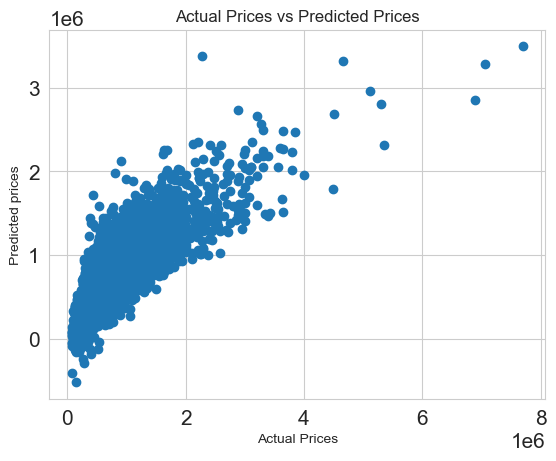

In [103]:
# Apply the function " predicted_vs_actual " on Linear Regression Model 
predicted_vs_actual(y_train, y_pred)

In [104]:
# Create a function that generate a scatter plot to visualize the relationship between the predicted prices (y_pred)
# and the residuals (the difference between the actual prices (y_train)
def predicted_vs_residuals(y_train, y_pred):
    
    # convert y_train and y_predict into flattened NumPy arrays to ensures compatibility and consistent dimensions for plotting
    y_train = y_train.values.flatten()
    y_pred = y_pred.flatten()

    # This line creates the scatter plot 
    plt.scatter(y_pred, y_train - y_pred)
    # This line sets the label for the x-axis as "Prices"
    plt.xlabel("Predicted Prices")
    # This line sets the label for the y-axis as "Predicted prices"
    plt.ylabel("Residuals")
    # This line sets the title of the scatter plot as "Prices vs Predicted prices"
    plt.title("Predicted Prices vs Residuals")
    # This line displays the scatter plot on the screen.
    plt.show()

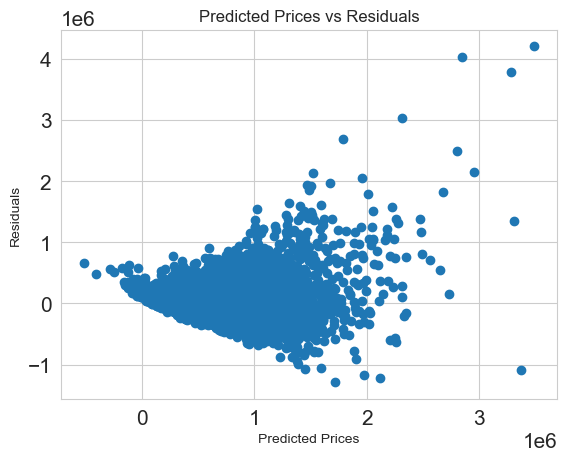

In [105]:
# Apply "predicted_vs_residuals" on Linear Regression Model
predicted_vs_residuals(y_train, y_pred)

## Desision Tree Regressor
### Model Development 

- We apply grid search to find the best combination of hyperparameters that optimize the performance of the Decision Tree Regressor model on the training data

- We commented this block of code because it takes time to run

In [106]:
# Creates an instance of the DecisionTreeRegressor model
#Decision_Tree_Regressor = DecisionTreeRegressor()

# This dictionary defines the hyperparameter grid to be searched
#Grid_Parameters = {'min_samples_split': [15, 5, 10],
#               'max_depth': [None , 5 , 10],
#               'max_leaf_nodes': [None, 100 , 200, 300],'min_samples_leaf':  [5 , 10 ,15]}

# This line creates an instance of the GridSearchCV class from scikit-learn, which performs a grid search with cross-validation
#Grid_Search = GridSearchCV(Decision_Tree_Regressor, Grid_Parameters , cv = 5)

# This line fits the GridSearchCV on trained data
#Grid_Search.fit(X_train , y_train)

#This line retrieves the best hyperparameters
#Best_Parameter = Grid_Search.best_params_

# This line retrieves the best score achieved by the model during the grid search
#Best_Score = Grid_Search.best_score_

In [107]:
#print(Best_Parameter)

#### The result of Print Statment
- By performing GridSearchCV we got these results

                       {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}

In [108]:
# Create a Decision Tree regressor
Decision_Tree_Regressor = tree.DecisionTreeRegressor(min_samples_split=15, min_samples_leaf=5, max_leaf_nodes=300)

# Train the model using the training data
Decision_Tree_Regressor.fit(X_train, y_train)

# Apply the model on training dataset
y_pred = Decision_Tree_Regressor.predict(X_train)

# Apply the model on testing dataset
y_test_pred = Decision_Tree_Regressor.predict(X_test)

# Calculate model preformane 
Decision_Tree_Regressor_Accuracy = metrics.r2_score(y_test, y_test_pred)
Decision_Tree_Regressor_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_pred))

### Model Evaluation 

In [109]:
# Print R-Squared and RSME 
print('R^2:', Decision_Tree_Regressor_Accuracy)
print('RMSE:', Decision_Tree_Regressor_RMSE)

R^2: 0.8262689202417922
RMSE: 121924.93608387544


### Plot the Differance between Predicted Values and Actual Values in Decision Tree Regressor

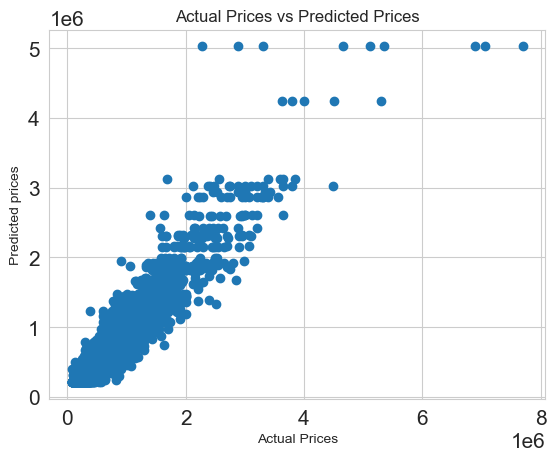

In [110]:
# Apply the function " predicted_vs_actual " on DecisionTreeRegressor
predicted_vs_actual(y_train, y_pred)

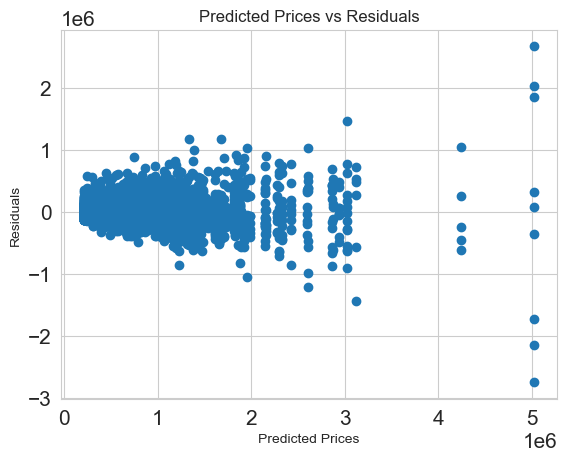

In [111]:
# Apply "predicted_vs_residuals" on DecisionTreeRegressor
predicted_vs_residuals(y_train, y_pred)

## Random Forst Regression Model 
### Model Development 

- We apply grid search to find the best combination of hyperparameters that optimize the performance of the Random Forst model on the training data

- We commented this block of code because it takes time to run

In [112]:
# Create an instance of Random Forest Regressor
#Random_Forst = RandomForstRegressor()

# Fit the Random Forest model to the training data
#Random_Forst.fit(X_train , y_train)

# Define the hyperparameter grid for grid search
#Grid_Parameters = {'n_estimators': [100 , 200 , 300],
#               'max_depth': [5 , 10 , 15],
#               'min_samples_split': [10 , 15, 20]}

# Create an instance of GridSearchCV
#Grid_Search = GridSearchCV(Random_Forst, Grid_Parameters , cv = 5)

# Perform grid search on Random Forest model
#Grid_Search.fit(X_train , y_train)

#This line retrieves the best hyperparameters
#Best_Parameter = Grid_Search.best_params_

# This line retrieves the best score achieved by the model during the grid search
#Best_Score = Grid_Search.best_score_

In [113]:
#print(Best_Parameter)

#### The result of print statment
- By performing GridSearchCV we got these results

                   {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}

In [114]:
# Create a Decision Tree regressor
Random_Forst = RandomForestRegressor(n_estimators=100, min_samples_split=10, max_depth=15)

# Fit the Random Forest model to the training data
Random_Forst.fit(X_train, y_train)

# Apply the model on training dataset
y_pred = Random_Forst.predict(X_train)

# Apply the model on testing dataset
y_test_pred = Random_Forst.predict(X_test)

# Calculate model preformane 
Random_Forst_Accuracy = metrics.r2_score(y_test, y_test_pred)
Random_Forst_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_pred))

### Model Evaluation 

In [115]:
# Print R-Squared and RSME 
print('R^2:', Random_Forst_Accuracy)
print('RMSE:', Random_Forst_RMSE)

R^2: 0.8898834734169583
RMSE: 82323.15769455879


### Plot the Differance between Predicted Values and Actual Values in Random Forst Regressor

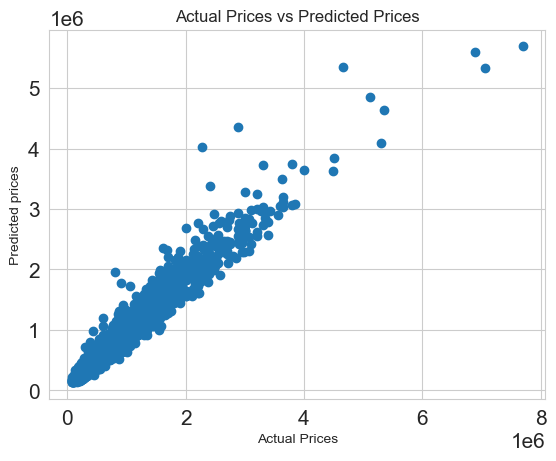

In [116]:
# Apply the function " predicted_vs_actual " on RandomForestRegressor
predicted_vs_actual(y_train, y_pred)

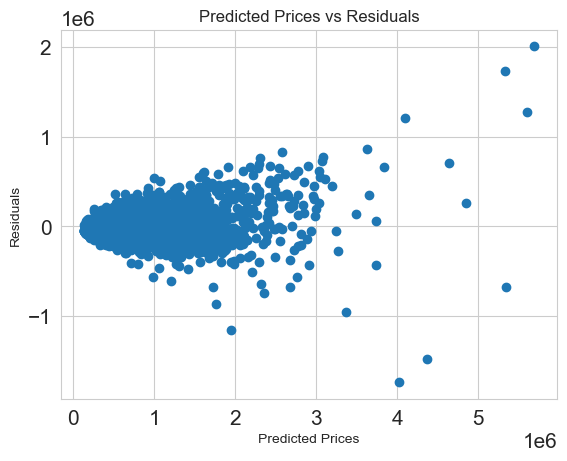

In [117]:
# Apply "predicted_vs_residuals" on RandomForestRegressor
predicted_vs_residuals(y_train, y_pred)

## CatBoost Regression Model 
### Model Development 

- We apply grid search to find the best combination of hyperparameters that optimize the performance of the Random Forst model on the training data

- We commented this block of code because it takes time to run

In [118]:
# Create an instance of CatBoost Regressor
#Cat_Boost = CatBoostRegressor()

# Fit the CatBoost model to the training data
#Cat_Boost.fit(X_train , y_train)

# Create an instance of GridSearchCV
#Grid_Parameters = {'n_estimators': np.arange(50, 200, 10),
#    'max_depth':np.arange(5,15),
#    'learning_rate': [0.1, 0.2, 0.3]}

# Create an instance of GridSearchCV
#Grid_Search = GridSearchCV(Cat_Boost, Grid_Parameters , cv=5, scoring='neg_mean_squared_error')

# This line fits the GridSearchCV on trained data
#Grid_Search.fit(X_train , y_train)

#This line retrieves the best hyperparameters
#Best_Parameter = Grid_Search.best_params_

# Calculate model preformane 
#Best_Score = Grid_Search.best_score_

In [119]:
#print(Best_Parameter)

#### The result of print statment
- By performing GridSearchCV we got these results

                   {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 190}

In [120]:
np.random.seed(42)
# Create a CatBoost Regressor
Cat_Boost = CatBoostRegressor(n_estimators = 190, learning_rate = 0.2 , max_depth = 6,random_seed=42)


# Fit the CatBoost Regressor model to the training data
Cat_Boost.fit(X_train, y_train)


# Apply the model on training dataset
y_pred = Cat_Boost.predict(X_train)


# Apply the model on testing dataset
y_test_pred = Cat_Boost.predict(X_test)

# Calculate model preformane 
Cat_Boost_Accuracy = metrics.r2_score(y_test, y_test_pred)
Cat_Boost_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_pred))

0:	learn: 326708.9590601	total: 157ms	remaining: 29.6s
1:	learn: 289412.9370289	total: 167ms	remaining: 15.7s
2:	learn: 261723.4026577	total: 174ms	remaining: 10.8s
3:	learn: 238100.0614126	total: 180ms	remaining: 8.35s
4:	learn: 219510.3891396	total: 185ms	remaining: 6.84s
5:	learn: 204798.2064997	total: 190ms	remaining: 5.83s
6:	learn: 191694.7286054	total: 195ms	remaining: 5.11s
7:	learn: 181744.1154869	total: 201ms	remaining: 4.57s
8:	learn: 173944.0902695	total: 206ms	remaining: 4.14s
9:	learn: 167090.5834010	total: 211ms	remaining: 3.8s
10:	learn: 161494.0029060	total: 216ms	remaining: 3.52s
11:	learn: 156871.0210864	total: 221ms	remaining: 3.29s
12:	learn: 151825.5665128	total: 227ms	remaining: 3.09s
13:	learn: 146578.7214696	total: 234ms	remaining: 2.94s
14:	learn: 144126.8507695	total: 239ms	remaining: 2.79s
15:	learn: 142080.0537585	total: 244ms	remaining: 2.66s
16:	learn: 139912.5923374	total: 249ms	remaining: 2.54s
17:	learn: 136941.6336531	total: 255ms	remaining: 2.43s
18:

181:	learn: 85339.0701528	total: 1.18s	remaining: 51.8ms
182:	learn: 85245.0115845	total: 1.19s	remaining: 45.3ms
183:	learn: 85116.1353544	total: 1.19s	remaining: 38.9ms
184:	learn: 85055.8031268	total: 1.2s	remaining: 32.4ms
185:	learn: 84942.9518029	total: 1.21s	remaining: 25.9ms
186:	learn: 84848.2910137	total: 1.21s	remaining: 19.5ms
187:	learn: 84766.1946943	total: 1.22s	remaining: 13ms
188:	learn: 84697.3825866	total: 1.23s	remaining: 6.48ms
189:	learn: 84630.6311669	total: 1.23s	remaining: 0us


### Model Evaluation 

In [121]:
# Print R-Squared and RSME 
print('R^2:', Cat_Boost_Accuracy)
print('RMSE:', Cat_Boost_RMSE)

R^2: 0.9041493994193441
RMSE: 84630.63116688894


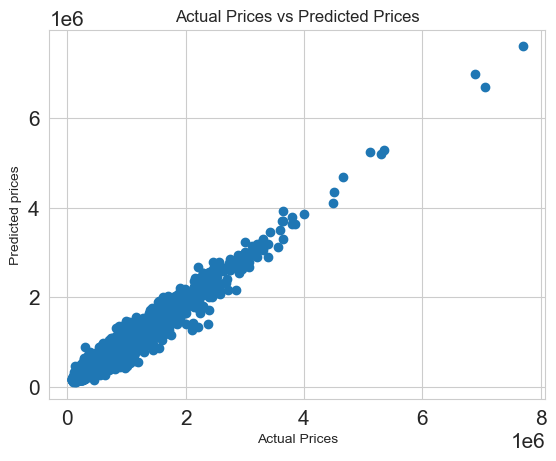

In [122]:
# Apply the function " predicted_vs_actual " on CatBoost Regressor
predicted_vs_actual(y_train, y_pred)

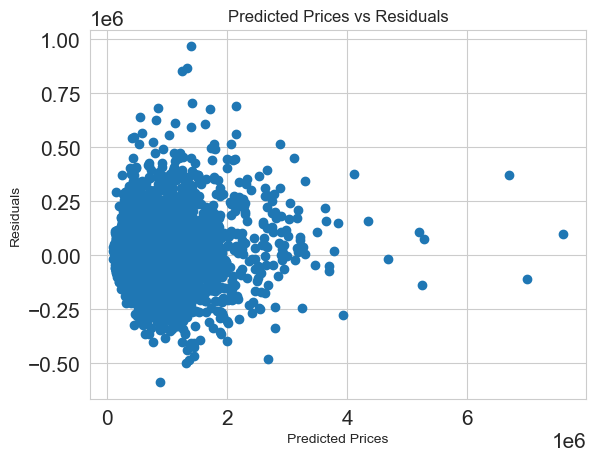

In [123]:
# Apply "predicted_vs_residuals" on CatBoost Regressor
predicted_vs_residuals(y_train, y_pred)

In [124]:
# Saving the model as a pickle file
with open('catboost_model.pkl', 'wb') as f:
    pickle.dump(Cat_Boost, f)

In [125]:
Regression_Models = pd.DataFrame({
    'Regression Model': ['CatBoostRegressor', 'RandomForstRegressor' ,'DecisionTreeRegressor','LinearRegression'], 'RMSE' : [Cat_Boost_RMSE ,Random_Forst_RMSE  ,Decision_Tree_Regressor_RMSE,Linear_Regression_RMSE], 
    'R^2': [Cat_Boost_Accuracy*100, Random_Forst_Accuracy*100,Decision_Tree_Regressor_Accuracy*100,Linear_Regression_Accuracy*100]})
Regression_Models.sort_values(by='R^2', ascending=False)

,Regression Model,RMSE,R^2
0,CatBoostRegressor,84630.631167,90.414940
1,RandomForstRegressor,82323.157695,88.988347
2,DecisionTreeRegressor,121924.936084,82.626892
3,LinearRegression,190165.925563,69.591506


In [126]:
# Saving the weights and other necessary information of the CatBoost model to the model_weights.cbm file 

Cat_Boost.save_model("model_weights.cbm")

- ".cbm" extension is specific to the CatBoost library and may not be recognized by other machine learning libraries or frameworks.

### We chose to deploy CatBoost Regressor because it has the highest accuracy, low RMSE, and fast results. 

In [ ]:
import numpy as np 
import gradio as gr
import numpy as np

# Load the saved model
Cat_Boost.load_model("model_weights.cbm")
# Prepare the input data for prediction
def predict(bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, yr_built, zipcode, lat, long, has_basement, renovated, has_view):
    input_data = np.array([bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, yr_built, zipcode, lat, long, has_basement, renovated, has_view]).reshape(-1, 1).T
    prediction = Cat_Boost.predict(input_data)    # Make the prediction using the loaded CatBoost model
    rounded_prediction = round(prediction[0], 3)  # Round the prediction to 2 decimal places
    return rounded_prediction

# Define the input components for the Gradio interface
input_components = [
    gr.inputs.Number(label="Number of Bedrooms"),
    gr.inputs.Number(label="Number of Bathrooms"),
    gr.inputs.Number(label="Sqft Living"),
    gr.inputs.Number(label="Sqft Lot"),
    gr.inputs.Number(label="Floors"),
    gr.inputs.Checkbox(label="Waterfront"),
    gr.inputs.Checkbox(label="View"),
    gr.inputs.Number(label="Condition"),
    gr.inputs.Number(label="Grade"),
    gr.inputs.Number(label="Year Built"),
    gr.inputs.Number(label="Zipcode"),
    gr.inputs.Number(label="Latitude"),
    gr.inputs.Number(label="Longitude"),
    gr.inputs.Checkbox(label="Has Basement"),
    gr.inputs.Checkbox(label="Renovated"),
    gr.inputs.Checkbox(label="Has View"),
]
# Define the output component for the Gradio interface
output_component = gr.outputs.Textbox(label="Prediction")
# Create and launch the Gradio interface
gr.Interface(fn=predict, inputs=input_components, outputs=output_component, title="House Price Predictor", button_text="Predict",interface_color=" #ff7eb3").launch()
